In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score,f1_score,precision_score,recall_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel,f_classif,f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, explained_variance_score,f1_score,precision_score,recall_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.decomposition import PCA


In [2]:
data = loadmat('ConnectivityFeatures.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Sep 14 16:09:44 2021',
 '__version__': '1.0',
 '__globals__': [],
 'N': array([[39]], dtype=uint8),
 'Norm01': array([[(array([[[  14.0500288 ,    4.5982728 ,  -37.07828903, ...,
                   -31.54125404,  -45.77269363,   11.13742828],
                 [  14.37486935,   -2.39312029,  -35.50805283, ...,
                   -25.14631844,  -40.85920715,   13.3809576 ],
                 [  14.53674126,   -7.35386992,  -34.48316193, ...,
                   -19.15168762,  -36.68637466,   14.71709633],
                 ...,
                 [ 101.87356567,   -0.4431186 ,   42.60646057, ...,
                     7.3546586 ,  -51.40280533, -106.72655487],
                 [  95.96482086,   -7.13801193,   43.72925949, ...,
                    11.55973339,  -44.5174675 , -109.85425568],
                 [  88.94441986,  -14.49476624,   44.89969635, ...,
                    18.01708794,  -35.55759811, -112.99825287]],
 

In [3]:
featuredictdistractor={}
for trial in range(1,40):
    locals()['featuredictdistractor{0}'.format(trial)] = {}
    #amplitude of peaks
    count=0
    for listelem in data['betweennessbin_distractor%s' %trial]:
        count += len(listelem)
                        
        for p in range(1,count+1):
            locals()['featuredictdistractor{0}'.format(trial)]['betweennessbin_%s' %p]=data['betweennessbin_distractor%s_%s' %(trial,p)].tolist()
    
    
    count2=0
    for listelem in data['charpath_distractor%s' %trial]:
        count2 += len(listelem)
                        
        for p in range(1,count2+1):
            locals()['featuredictdistractor{0}'.format(trial)]['charpath_%s' %(p)]=data['charpath_distractor%s_%s' %(trial,p)].tolist()
      
    
    
    count3=0
    for listelem in data['clustering_coe_distractor%s' %trial]:
        count3 += len(listelem)
                        
        for p in range(1,count3+1):
            locals()['featuredictdistractor{0}'.format(trial)]['clustering_coe_%s' %(p)]=data['clustering_coe_distractor%s_%s' %(trial,p)].tolist()
      
    
    
    count4=0
    for listelem in data['degree_distractor%s' %trial]:
        count4 += len(listelem)
                        
        for p in range(1,count4+1):
            locals()['featuredictdistractor{0}'.format(trial)]['degree_%s' %(p)]=data['degree_distractor%s_%s' %(trial,p)].tolist()
      
    
    
    count5=0
    for listelem in data['efficiency_distractor%s' %trial]:
        count5 += len(listelem)
                        
        for p in range(1,count5+1):
            locals()['featuredictdistractor{0}'.format(trial)]['efficiency_%s' %(p)]=data['efficiency_distractor%s_%s' %(trial,p)].tolist()
      
    count6=0
    for listelem in data['modularity_distractor%s' %trial]:
        count6 += len(listelem)
                        
        for p in range(1,count6+1):
            locals()['featuredictdistractor{0}'.format(trial)]['modularity_%s' %(p)]=data['modularity_distractor%s_%s' %(trial,p)].tolist()
      
    
    count7=0
    for listelem in data['transitivity_distractor%s' %trial]:
        count7 += len(listelem)
                        
        for p in range(1,count7+1):
            locals()['featuredictdistractor{0}'.format(trial)]['transitivity_%s' %(p)]=data['transitivity_distractor%s_%s' %(trial,p)].tolist()
      
    
    
    
    
    
    
    
    locals()['distractor_df_{0}'.format(trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredictdistractor{0}'.format(trial)].items()]))
    locals()['distractor_df_{0}'.format(trial)] = locals()['distractor_df_{0}'.format(trial)].fillna(0)
   
        
distractor_df_4.betweennessbin_64

0    0.054674
Name: betweennessbin_64, dtype: float64

 ### target features

In [4]:
featuredicttarget={}
for trial in range(1,41):
    locals()['featuredicttarget{0}'.format(trial)] = {}
    #amplitude of peaks
    count=0
    for listelem in data['betweennessbin_target%s' %trial]:
        count += len(listelem)
                        
        for p in range(1,count+1):
            locals()['featuredicttarget{0}'.format(trial)]['betweennessbin_%s' %(p)]=data['betweennessbin_target%s_%s' %(trial,p)].tolist()
    
    
    count2=0
    for listelem in data['charpath_target%s' %trial]:
        count2 += len(listelem)
                        
        for p in range(1,count2+1):
            locals()['featuredicttarget{0}'.format(trial)]['charpath_%s' %(p)]=data['charpath_target%s_%s' %(trial,p)].tolist()
      
    
    
    count3=0
    for listelem in data['clustering_coe_target%s' %trial]:
        count3 += len(listelem)
                        
        for p in range(1,count3+1):
            locals()['featuredicttarget{0}'.format(trial)]['clustering_coe_%s' %(p)]=data['clustering_coe_target%s_%s' %(trial,p)].tolist()
      
    
    
    count4=0
    for listelem in data['degree_target%s' %trial]:
        count4 += len(listelem)
                        
        for p in range(1,count4+1):
            locals()['featuredicttarget{0}'.format(trial)]['degree_%s' %(p)]=data['degree_target%s_%s' %(trial,p)].tolist()
      
    
    
    count5=0
    for listelem in data['efficiency_target%s' %trial]:
        count5 += len(listelem)
                        
        for p in range(1,count5+1):
            locals()['featuredicttarget{0}'.format(trial)]['efficiency_%s' %(p)]=data['efficiency_target%s_%s' %(trial,p)].tolist()
      
    count6=0
    for listelem in data['modularity_target%s' %trial]:
        count6 += len(listelem)
                        
        for p in range(1,count6+1):
            locals()['featuredicttarget{0}'.format(trial)]['modularity_%s' %(p)]=data['modularity_target%s_%s' %(trial,p)].tolist()
      
    
    count7=0
    for listelem in data['transitivity_target%s' %trial]:
        count7 += len(listelem)
                        
        for p in range(1,count7+1):
            locals()['featuredicttarget{0}'.format(trial)]['transitivity_%s' %(p)]=data['transitivity_target%s_%s' %(trial,p)].tolist()
      
    
    
    
    
    
    
    
    locals()['target_df_{0}'.format(trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredicttarget{0}'.format(trial)].items()]))
    locals()['target_df_{0}'.format(trial)] = locals()['target_df_{0}'.format(trial)].fillna(0)
   
        
target_df_3.shape

(1, 259)

In [5]:
dfs = []
for trial in range(1,40):
    #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
    dfs.append(locals()['distractor_df_{0}'.format(trial)] )
df_distractor=pd.concat(dfs,ignore_index=True)
df_distractor=df_distractor.fillna(0)
df_distractor

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,1,2,2,1,1,1,1,0.718207
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,1,3,1,3,1,1,0.642747
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,1,3,2,1,1,1,1,0.600715
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,1,2,2,2,1,1,1,0.740835
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,1,2,2,2,1,1,1,0.744963
5,0.021748,0.021049,0.021810,0.026414,0.024333,0.019586,0.019552,0.020362,0.031842,0.022860,...,2,2,2,1,1,1,1,2,2,0.766130
6,0.013323,0.014531,0.015309,0.010760,0.018854,0.023397,0.022166,0.018858,0.013482,0.024684,...,3,3,3,1,1,3,3,3,3,0.682110
7,0.008287,0.004599,0.003915,0.018004,0.012955,0.006996,0.003312,0.089908,0.026275,0.015998,...,1,1,1,2,2,1,1,1,1,0.678583
8,0.006361,0.004406,0.005021,0.016384,0.014481,0.005404,0.015424,0.057606,0.034410,0.013391,...,2,2,2,1,1,2,2,2,2,0.701189
9,0.028389,0.027827,0.027616,0.028574,0.028999,0.004101,0.015035,0.021260,0.035298,0.003767,...,2,2,2,1,1,2,2,2,2,0.671733


In [6]:
df_distractor['label']=0

In [7]:
dfst = []
for trial in range(1,41):
    #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
    dfst.append(locals()['target_df_{0}'.format(trial)] )
df_target=pd.concat(dfst,ignore_index=True)
df_target=df_target.fillna(0)
df_target


,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.413460,0.093595,0.868158,0.000000,1.057217,0.121671,0.079526,0.015347,0.298429,0.133058,...,1,1,1,2,1,2,1,1,1,0.668596
1,0.025528,0.026358,0.023552,0.017200,0.018823,0.023297,0.025167,0.039820,0.009839,0.011870,...,2,2,2,1,1,1,1,2,2,0.701424
2,0.029330,0.027390,0.026729,0.037519,0.036463,0.031647,0.001233,0.030574,0.042371,0.033453,...,2,2,2,1,1,2,2,2,2,0.651728
3,0.038121,0.041178,0.013846,0.007439,0.040052,0.063430,0.057622,0.011725,0.052171,0.007405,...,1,1,1,1,2,1,2,1,1,0.673299
4,0.004118,0.037147,0.035277,0.058519,0.018912,0.039210,0.040855,0.011481,0.095553,0.000573,...,2,2,2,1,3,2,3,2,2,0.600984
5,0.016636,0.017065,0.013771,0.034339,0.032389,0.031222,0.017688,0.013378,0.031346,0.037655,...,3,3,3,2,2,3,1,3,3,0.757436
6,0.030235,0.030594,0.032510,0.004438,0.024754,0.024105,0.031950,0.037646,0.061761,0.016867,...,1,1,1,2,2,1,1,1,1,0.747516
7,0.019716,0.017630,0.016921,0.023791,0.016320,0.009365,0.007519,0.011360,0.021303,0.011900,...,1,1,1,2,2,1,2,1,1,0.780849
8,0.018283,0.012944,0.016972,0.016964,0.010095,0.012928,0.010284,0.008232,0.015890,0.008121,...,2,2,2,1,1,2,2,2,2,0.732065
9,0.018748,0.020804,0.016832,0.038268,0.005941,0.006548,0.033106,0.010791,0.038759,0.060162,...,1,1,1,2,2,1,1,1,1,0.584231


In [8]:
df_target['label']=1

In [9]:
df=pd.concat([df_distractor, df_target] , ignore_index=True)
df=df.fillna(0)
df

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,2,2,1,1,1,1,0.718207,0
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,3,1,3,1,1,0.642747,0
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,3,2,1,1,1,1,0.600715,0
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,2,2,2,1,1,1,0.740835,0
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,2,2,2,1,1,1,0.744963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,7.082127,6.497632,5.238248,0.011696,0.000854,0.005706,0.000399,4.829648,0.028764,0.016027,...,3,3,2,2,3,2,3,3,0.823352,1
75,0.025337,0.022584,0.016269,0.034795,0.030350,0.019306,0.001753,0.054647,0.032915,0.020650,...,1,1,2,2,1,1,1,1,0.684342,1
76,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,3,2,2,3,3,3,3,0.802362,1
77,0.016346,0.033259,0.025171,0.011672,0.039454,0.057729,0.032159,0.000399,0.011822,0.030141,...,1,1,1,3,1,1,1,1,0.568320,1


In [10]:
X = df.loc[:, ~df.columns.isin(['label'])]
y=df[['label']]

### New

In [11]:
from sklearn.decomposition import PCA
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
seed = 111
#LR_L1 = LogisticRegression(penalty='l1', random_state=seed, solver='saga', max_iter=1e5)
#lsvc = LinearSVC(penalty="l1", dual=False)
anova_filter = SelectKBest(f_classif)
pipe = Pipeline([('scaler', StandardScaler()),
                  ('pca',PCA()),
                  ('anova_filt', anova_filter),
                 ('classifier', RandomForestClassifier()),
                # ('classifiern', KNeighborsClassifier()),
                ])
Lambda = np.array([])
for i in [1e-1, 1, 1e-2]:
    Lambda = np.append(Lambda, i * np.arange(2, 5, 2))

Lambda

search_space = [
                 #{'selector__k': [5, 10, 20, 30]},
                { 'anova_filt__k': [2, 5, 10]},
                #{'SelectFromModel__estimator__C': Lambda},
                {'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [LogisticRegression(solver='lbfgs')],
                 'pca__n_components':[2,5,10],
                 'classifier__C': Lambda,
                 
                },
                {'classifier': [RandomForestClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__n_estimators': [ 10,100, 500],
                  # 'classifier__n_neighbors': [3, 7, 11],
                'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [DecisionTreeClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [KNeighborsClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__n_neighbors': [3, 7, 11],
                 'classifier__weights': ['uniform', 'distance']},
                {'classifier': [LinearSVC(class_weight = 'balanced',  dual=False, random_state = np.random.seed(7), tol=1e-05)],
                 'pca__n_components':[2,5,10],
                 'classifier__C':[ np.arange(0.01,100,10) ],
                 #'classifier__max_features': np.arange(10,40,10)
                 #'classifier__gamma': [0.01, 0.1]
                }
                ]
#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

scoring = {

'accuracy': make_scorer(accuracy_score),

'sensitivity': make_scorer(recall_score),

'specificity': make_scorer(recall_score,pos_label=0)

}
clf=GridSearchCV(pipe, search_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

cv_outer = RepeatedStratifiedKFold(

n_splits=10, n_repeats=1, random_state=0

)

scores = cross_validate(clf, X, y, scoring=scoring, cv=cv_outer, n_jobs=-1)
#print(scores1)
normacc=mean(scores['test_accuracy'])
print(mean(scores['test_accuracy']))
print(mean(scores['test_sensitivity']))
print(mean(scores['test_specificity']))

print(std(scores['test_accuracy']))
print(std(scores['test_sensitivity']))
print(std(scores['test_specificity']))


0.5464285714285715
0.475
0.6166666666666667
0.09319991679071349
0.2358495283014151
0.19790570145063197


In [12]:
result=pd.DataFrame([['for single normal subject',normacc]],columns=['subjecttypes','Accuracy'])
result

,subjecttypes,Accuracy
0,for single normal subject,0.546429


#### for a group of 10 normal group

In [14]:
datagroup = loadmat('connectivityfeaturesgroup.mat')

In [15]:
datagroup

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Sep 18 16:31:47 2021',
 '__version__': '1.0',
 '__globals__': [],
 'N': array([[9]], dtype=uint8),
 'Nn': array([[36]], dtype=uint8),
 'Norm01': array([[(array([[[  14.0500288 ,    4.5982728 ,  -37.07828903, ...,
           -31.54125404,  -45.77269363,   11.13742828],
         [  14.37486935,   -2.39312029,  -35.50805283, ...,
           -25.14631844,  -40.85920715,   13.3809576 ],
         [  14.53674126,   -7.35386992,  -34.48316193, ...,
           -19.15168762,  -36.68637466,   14.71709633],
         ...,
         [ 101.87356567,   -0.4431186 ,   42.60646057, ...,
             7.3546586 ,  -51.40280533, -106.72655487],
         [  95.96482086,   -7.13801193,   43.72925949, ...,
            11.55973339,  -44.5174675 , -109.85425568],
         [  88.94441986,  -14.49476624,   44.89969635, ...,
            18.01708794,  -35.55759811, -112.99825287]],
 
        [[  10.08216381,    3.1163311 ,  -33.97867203, ...,
 

In [16]:
datagroup['betweennessbin_distractor2_33']

array([[0.05071802, 0.01781956, 0.00977629, 0.05679898, 0.02825419,
        0.01690341, 0.05528823, 0.03077135, 0.04843671, 0.01656625,
        0.01669531, 0.06987221, 0.        , 0.0555869 , 0.03619927,
        0.00882127, 0.02934494, 0.05184111, 0.        , 0.04541632,
        0.00969375, 0.00933243, 0.04871212, 0.03591603, 0.03701734,
        0.01061791, 0.03375349, 0.04480793, 0.00628444, 0.02846741,
        0.00554637, 0.02062852, 0.01360929, 0.03391634, 0.0430628 ,
        0.04865303, 0.05104057, 0.01482833, 0.02982307, 0.07194458,
        0.02411676, 0.0028309 , 0.04689608, 0.04119853, 0.02218563,
        0.00720955, 0.04829887, 0.02979304, 0.00414862, 0.03330118,
        0.04888325, 0.01388201, 0.02125382, 0.03496083, 0.04160483,
        0.03636433, 0.02382939, 0.01941821, 0.05254608, 0.05395837,
        0.03941524, 0.04338891, 0.04697885, 0.02077065]])

In [17]:
featuredictdistractor={}
for sub in range(1,11):
    if sub==1: 
        trials=39 
    elif sub==2:
         trials=33
    elif sub==3:
         trials=35
    elif sub==4:
         trials=32
    elif sub==5:
         trials=37
    elif sub==6:
         trials=36
    elif sub==7:
         trials=23
    elif sub==8:
         trials=31
    elif sub==9:
         trials=33
    elif sub==10:
         trials=36

    for trial in range(1,trials+1):
        locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in datagroup['betweennessbin_distractor%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=datagroup['betweennessbin_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in datagroup['charpath_distractor%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=datagroup['charpath_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in datagroup['clustering_coe_distractor%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=datagroup['clustering_coe_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in datagroup['degree_distractor%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=datagroup['degree_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in datagroup['efficiency_distractor%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=datagroup['efficiency_distractor%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in datagroup['modularity_distractor%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=datagroup['modularity_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in datagroup['transitivity_distractor%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=datagroup['transitivity_distractor%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] = locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        


### target feature

In [18]:
featuredicttarget={}
for sub in range(1,11):
    if sub==1: 
        trials=40 
    elif sub==2:
         trials=36
    elif sub==3:
         trials=35
    elif sub==4:
         trials=36
    elif sub==5:
         trials=35
    elif sub==6:
         trials=31
    elif sub==7:
         trials=29
    elif sub==8:
         trials=29
    elif sub==9:
         trials=37
    elif sub==10:
         trials=34

    for trial in range(1,trials+1):
        locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in datagroup['betweennessbin_target%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=datagroup['betweennessbin_target%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in datagroup['charpath_target%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=datagroup['charpath_target%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in datagroup['clustering_coe_target%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=datagroup['clustering_coe_target%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in datagroup['degree_target%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=datagroup['degree_target%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in datagroup['efficiency_target%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=datagroup['efficiency_target%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in datagroup['modularity_target%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=datagroup['modularity_target%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in datagroup['transitivity_target%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=datagroup['transitivity_target%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['target_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['target_df_{s}{t}'.format(s=sub,t=trial)] = locals()['target_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        


In [19]:
dfsg = []
for sub in range(1,11):
    if sub==1: 
        trials=39 
    elif sub==2:
         trials=33
    elif sub==3:
         trials=35
    elif sub==4:
         trials=32
    elif sub==5:
         trials=37
    elif sub==6:
         trials=36
    elif sub==7:
         trials=23
    elif sub==8:
         trials=31
    elif sub==9:
         trials=33
    elif sub==10:
         trials=36

    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfsg.append(locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] )
df_distractorgroup=pd.concat(dfsg,ignore_index=True)
df_distractorgroup=df_distractorgroup.fillna(0)
df_distractorgroup

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,1,2,2,1,1,1,1,0.718207
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,1,3,1,3,1,1,0.642747
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,1,3,2,1,1,1,1,0.600715
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,1,2,2,2,1,1,1,0.740835
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,1,2,2,2,1,1,1,0.744963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,1,2,2,1,1,1,1,0.848312
331,0.002582,0.060274,0.060422,0.024183,0.023635,0.012426,0.059555,0.065116,0.034614,0.025071,...,1,1,1,2,2,2,2,1,1,0.676689
332,0.017151,0.020753,0.020819,0.009181,0.031496,0.027737,0.034620,0.013414,0.028095,0.029964,...,2,2,2,1,1,2,2,2,2,0.677015
333,0.024995,0.025933,0.027370,0.023110,0.028570,0.031326,0.035084,0.031573,0.017233,0.021938,...,1,1,1,2,2,2,2,1,1,0.811903


In [20]:
df_distractorgroup['label']=0

In [21]:
dfstg = []
for sub in range(1,11):
    if sub==1: 
        trials=40 
    elif sub==2:
         trials=36
    elif sub==3:
         trials=35
    elif sub==4:
         trials=36
    elif sub==5:
         trials=35
    elif sub==6:
         trials=31
    elif sub==7:
         trials=29
    elif sub==8:
         trials=29
    elif sub==9:
         trials=37
    elif sub==10:
         trials=34
    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfstg.append(locals()['target_df_{s}{t}'.format(s=sub,t=trial)] )
df_targetgroup=pd.concat(dfstg,ignore_index=True)
df_targetgroup=df_targetgroup.fillna(0)
df_targetgroup

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.413460,0.093595,0.868158,0.000000,1.057217,0.121671,0.079526,0.015347,0.298429,0.133058,...,1,1,1,2,1,2,1,1,1,0.668596
1,0.025528,0.026358,0.023552,0.017200,0.018823,0.023297,0.025167,0.039820,0.009839,0.011870,...,2,2,2,1,1,1,1,2,2,0.701424
2,0.029330,0.027390,0.026729,0.037519,0.036463,0.031647,0.001233,0.030574,0.042371,0.033453,...,2,2,2,1,1,2,2,2,2,0.651728
3,0.038121,0.041178,0.013846,0.007439,0.040052,0.063430,0.057622,0.011725,0.052171,0.007405,...,1,1,1,1,2,1,2,1,1,0.673299
4,0.004118,0.037147,0.035277,0.058519,0.018912,0.039210,0.040855,0.011481,0.095553,0.000573,...,2,2,2,1,3,2,3,2,2,0.600984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,0.030240,0.034424,0.030148,0.029306,0.048064,0.040656,0.015310,0.008928,0.046809,0.009654,...,1,1,1,2,2,1,1,1,1,0.671180
338,0.034209,0.038956,0.038698,0.014543,0.042623,0.044664,0.047292,0.041765,0.050652,0.020373,...,1,1,1,1,2,1,1,1,1,0.642080
339,0.000000,0.000000,0.000000,0.018263,0.197471,0.153230,0.006632,0.000000,0.323263,0.316854,...,1,1,1,1,2,1,2,1,1,0.712006
340,0.013128,0.017426,0.037712,0.033249,0.055286,0.034544,0.069684,0.029305,0.048896,0.017678,...,2,2,2,3,1,2,1,2,2,0.537707


In [22]:
df_targetgroup['label']=1

In [23]:
dfgroup=pd.concat([df_distractorgroup, df_targetgroup] , ignore_index=True)
dfgroup=dfgroup.fillna(0)
dfgroup

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,2,2,1,1,1,1,0.718207,0
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,3,1,3,1,1,0.642747,0
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,3,2,1,1,1,1,0.600715,0
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,2,2,2,1,1,1,0.740835,0
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,2,2,2,1,1,1,0.744963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.030240,0.034424,0.030148,0.029306,0.048064,0.040656,0.015310,0.008928,0.046809,0.009654,...,1,1,2,2,1,1,1,1,0.671180,1
673,0.034209,0.038956,0.038698,0.014543,0.042623,0.044664,0.047292,0.041765,0.050652,0.020373,...,1,1,1,2,1,1,1,1,0.642080,1
674,0.000000,0.000000,0.000000,0.018263,0.197471,0.153230,0.006632,0.000000,0.323263,0.316854,...,1,1,1,2,1,2,1,1,0.712006,1
675,0.013128,0.017426,0.037712,0.033249,0.055286,0.034544,0.069684,0.029305,0.048896,0.017678,...,2,2,3,1,2,1,2,2,0.537707,1


In [24]:
dfgroup.replace([np.inf, -np.inf], np.nan, inplace=True)
dfgroup=dfgroup.fillna(0)
dfgroup

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,2,2,1,1,1,1,0.718207,0
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,3,1,3,1,1,0.642747,0
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,3,2,1,1,1,1,0.600715,0
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,2,2,2,1,1,1,0.740835,0
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,2,2,2,1,1,1,0.744963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.030240,0.034424,0.030148,0.029306,0.048064,0.040656,0.015310,0.008928,0.046809,0.009654,...,1,1,2,2,1,1,1,1,0.671180,1
673,0.034209,0.038956,0.038698,0.014543,0.042623,0.044664,0.047292,0.041765,0.050652,0.020373,...,1,1,1,2,1,1,1,1,0.642080,1
674,0.000000,0.000000,0.000000,0.018263,0.197471,0.153230,0.006632,0.000000,0.323263,0.316854,...,1,1,1,2,1,2,1,1,0.712006,1
675,0.013128,0.017426,0.037712,0.033249,0.055286,0.034544,0.069684,0.029305,0.048896,0.017678,...,2,2,3,1,2,1,2,2,0.537707,1


In [25]:
Xgroup = dfgroup.loc[:, ~dfgroup.columns.isin(['label'])]
ygroup=dfgroup[['label']]

In [26]:
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
seed = 111
#LR_L1 = LogisticRegression(penalty='l1', random_state=seed, solver='saga', max_iter=1e5)
#lsvc = LinearSVC(penalty="l1", dual=False)
pipe = Pipeline([('scaler', StandardScaler()),
                  ('pca',PCA()),
                  ('anova_filt', anova_filter),
                 ('classifier', RandomForestClassifier()),
                # ('classifiern', KNeighborsClassifier()),
                ])
Lambda = np.array([])
for i in [1e-1, 1, 1e-2]:
    Lambda = np.append(Lambda, i * np.arange(2, 5, 2))

Lambda

search_space = [
                 #{'selector__k': [5, 10, 20, 30]},
                { 'anova_filt__k': [2, 5, 10]},
                #{'SelectFromModel__estimator__C': Lambda},
                {'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [LogisticRegression(solver='lbfgs')],
                 'pca__n_components':[2,5,10],
                 'classifier__C': Lambda,
                 
                },
                {'classifier': [RandomForestClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__n_estimators': [ 10,100, 500],
                  # 'classifier__n_neighbors': [3, 7, 11],
                'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [DecisionTreeClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [KNeighborsClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__n_neighbors': [3, 7, 11],
                 'classifier__weights': ['uniform', 'distance']},
                {'classifier': [LinearSVC(class_weight = 'balanced',  dual=False, random_state = np.random.seed(7), tol=1e-05)],
                 'pca__n_components':[2,5,10],
                 'classifier__C':[ np.arange(0.01,100,10) ],
                 #'classifier__max_features': np.arange(10,40,10)
                 #'classifier__gamma': [0.01, 0.1]
                }
                ]
#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

scoring = {

'accuracy': make_scorer(accuracy_score),

'sensitivity': make_scorer(recall_score),

'specificity': make_scorer(recall_score,pos_label=0)

}
clf=GridSearchCV(pipe, search_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

cv_outer = RepeatedStratifiedKFold(

n_splits=10, n_repeats=1, random_state=0

)

scores = cross_validate(clf, Xgroup, ygroup, scoring=scoring, cv=cv_outer, n_jobs=-1)
#print(scores1)
normgroupacc=mean(scores['test_accuracy'])
print(mean(scores['test_accuracy']))
print(mean(scores['test_sensitivity']))
print(mean(scores['test_specificity']))

print(std(scores['test_accuracy']))
print(std(scores['test_sensitivity']))
print(std(scores['test_specificity']))


0.5334723441615452
0.4828571428571428
0.5848484848484848
0.06346330278657566
0.09105087581757686
0.09435535530141395


In [27]:
groupresult=pd.DataFrame([['group of 10 normal subject',normgroupacc]],columns=['subjecttypes','Accuracy'])
result=result.append(groupresult, ignore_index=True)
result
#model_results = pd.DataFrame([['model for feature selection', acc_logisticregression,acc_svm,acc_naivebayes,acc_decisiontreeclassifier,acc_randomforest]],columns=['Feature selection ', 'Accuracy logistic regression', 'Accuracy SVM','Accuracy naivebayes','Accuracy decisiontreeclassifier','Accuracy randomforest'])
#results = results.append(model_results, ignore_index = True)
#results
#result
#groupresult

,subjecttypes,Accuracy
0,for single normal subject,0.546429
1,group of 10 normal subject,0.533472


#### for single schizo patient

In [29]:
dataschizo = loadmat('connectivityfeaturesschizo.mat')

In [30]:
featuredictdistractor={}
for trial in range(1,38):
    locals()['featuredictdistractor{0}'.format(trial)] = {}
    #amplitude of peaks
    count=0
    for listelem in dataschizo['betweennessbin_distractor%s' %trial]:
        count += len(listelem)
                        
        for p in range(1,count+1):
            locals()['featuredictdistractor{0}'.format(trial)]['betweennessbin_%s' %p]=dataschizo['betweennessbin_distractor%s_%s' %(trial,p)].tolist()
    
    
    count2=0
    for listelem in dataschizo['charpath_distractor%s' %trial]:
        count2 += len(listelem)
                        
        for p in range(1,count2+1):
            locals()['featuredictdistractor{0}'.format(trial)]['charpath_%s' %(p)]=dataschizo['charpath_distractor%s_%s' %(trial,p)].tolist()
      
    
    
    count3=0
    for listelem in dataschizo['clustering_coe_distractor%s' %trial]:
        count3 += len(listelem)
                        
        for p in range(1,count3+1):
            locals()['featuredictdistractor{0}'.format(trial)]['clustering_coe_%s' %(p)]=dataschizo['clustering_coe_distractor%s_%s' %(trial,p)].tolist()
      
    
    
    count4=0
    for listelem in dataschizo['degree_distractor%s' %trial]:
        count4 += len(listelem)
                        
        for p in range(1,count4+1):
            locals()['featuredictdistractor{0}'.format(trial)]['degree_%s' %(p)]=dataschizo['degree_distractor%s_%s' %(trial,p)].tolist()
      
    
    
    count5=0
    for listelem in dataschizo['efficiency_distractor%s' %trial]:
        count5 += len(listelem)
                        
        for p in range(1,count5+1):
            locals()['featuredictdistractor{0}'.format(trial)]['efficiency_%s' %(p)]=dataschizo['efficiency_distractor%s_%s' %(trial,p)].tolist()
      
    count6=0
    for listelem in dataschizo['modularity_distractor%s' %trial]:
        count6 += len(listelem)
                        
        for p in range(1,count6+1):
            locals()['featuredictdistractor{0}'.format(trial)]['modularity_%s' %(p)]=dataschizo['modularity_distractor%s_%s' %(trial,p)].tolist()
      
    
    count7=0
    for listelem in dataschizo['transitivity_distractor%s' %trial]:
        count7 += len(listelem)
                        
        for p in range(1,count7+1):
            locals()['featuredictdistractor{0}'.format(trial)]['transitivity_%s' %(p)]=dataschizo['transitivity_distractor%s_%s' %(trial,p)].tolist()
      
    
    
    
    
    
    
    
    locals()['distractor_df_{0}'.format(trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredictdistractor{0}'.format(trial)].items()]))
    locals()['distractor_df_{0}'.format(trial)] = locals()['distractor_df_{0}'.format(trial)].fillna(0)
   
        
distractor_df_4.betweennessbin_64

0    0.018521
Name: betweennessbin_64, dtype: float64

### target feature

In [31]:
featuredicttarget={}
for trial in range(1,37):
    locals()['featuredicttarget{0}'.format(trial)] = {}
    #amplitude of peaks
    count=0
    for listelem in dataschizo['betweennessbin_target%s' %trial]:
        count += len(listelem)
                        
        for p in range(1,count+1):
            locals()['featuredicttarget{0}'.format(trial)]['betweennessbin_%s' %(p)]=dataschizo['betweennessbin_target%s_%s' %(trial,p)].tolist()
    
    
    count2=0
    for listelem in dataschizo['charpath_target%s' %trial]:
        count2 += len(listelem)
                        
        for p in range(1,count2+1):
            locals()['featuredicttarget{0}'.format(trial)]['charpath_%s' %(p)]=dataschizo['charpath_target%s_%s' %(trial,p)].tolist()
      
    
    
    count3=0
    for listelem in dataschizo['clustering_coe_target%s' %trial]:
        count3 += len(listelem)
                        
        for p in range(1,count3+1):
            locals()['featuredicttarget{0}'.format(trial)]['clustering_coe_%s' %(p)]=dataschizo['clustering_coe_target%s_%s' %(trial,p)].tolist()
      
    
    
    count4=0
    for listelem in dataschizo['degree_target%s' %trial]:
        count4 += len(listelem)
                        
        for p in range(1,count4+1):
            locals()['featuredicttarget{0}'.format(trial)]['degree_%s' %(p)]=dataschizo['degree_target%s_%s' %(trial,p)].tolist()
      
    
    
    count5=0
    for listelem in dataschizo['efficiency_target%s' %trial]:
        count5 += len(listelem)
                        
        for p in range(1,count5+1):
            locals()['featuredicttarget{0}'.format(trial)]['efficiency_%s' %(p)]=dataschizo['efficiency_target%s_%s' %(trial,p)].tolist()
      
    count6=0
    for listelem in dataschizo['modularity_target%s' %trial]:
        count6 += len(listelem)
                        
        for p in range(1,count6+1):
            locals()['featuredicttarget{0}'.format(trial)]['modularity_%s' %(p)]=dataschizo['modularity_target%s_%s' %(trial,p)].tolist()
      
    
    count7=0
    for listelem in dataschizo['transitivity_target%s' %trial]:
        count7 += len(listelem)
                        
        for p in range(1,count7+1):
            locals()['featuredicttarget{0}'.format(trial)]['transitivity_%s' %(p)]=dataschizo['transitivity_target%s_%s' %(trial,p)].tolist()
      
    
    
    
    
    
    
    
    locals()['target_df_{0}'.format(trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredicttarget{0}'.format(trial)].items()]))
    locals()['target_df_{0}'.format(trial)] = locals()['target_df_{0}'.format(trial)].fillna(0)
   
        
target_df_3.shape

(1, 259)

In [32]:
dfschizo = []
for trial in range(1,38):
    #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
    dfschizo.append(locals()['distractor_df_{0}'.format(trial)] )
df_distractorschizo=pd.concat(dfschizo,ignore_index=True)
df_distractorschizo=df_distractorschizo.fillna(0)
df_distractorschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.032033,0.035855,0.047251,0.005241,0.010948,0.015967,0.045507,0.070554,0.015737,0.011417,...,1,1,1,2,2,1,1,1,1,0.704493
1,0.026231,0.026689,0.025308,0.027719,0.027605,0.023115,0.024471,0.022227,0.026108,0.019325,...,1,1,1,2,2,1,2,1,1,0.754594
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2,2,2,1,3,2,2,2,1.000763
3,0.045429,0.003638,0.016354,0.032983,0.007074,0.021168,0.021672,0.027370,0.092864,0.014838,...,1,1,1,2,2,1,1,1,1,0.631891
4,0.016400,0.017195,0.017194,0.017477,0.018878,0.022300,0.021614,0.019461,0.023353,0.025470,...,1,1,1,2,2,1,1,1,1,0.658614
5,0.009593,0.010526,0.011395,0.013242,0.015301,0.021094,0.016659,0.005411,0.020190,0.023277,...,1,1,1,2,2,1,1,1,1,0.632342
6,0.060317,0.049535,0.029302,0.060377,0.014571,0.005223,0.055526,0.041311,0.061077,0.007260,...,1,1,1,2,2,1,1,1,1,0.592841
7,0.007199,0.008313,0.009435,0.007940,0.020370,0.018972,0.011918,0.010239,0.018839,0.024614,...,1,1,1,2,2,1,1,1,1,0.664368
8,0.011231,0.012941,0.012303,0.012551,0.045359,0.024253,0.008820,0.003680,0.041627,0.028552,...,2,3,3,1,1,2,3,2,3,0.580410
9,0.001597,0.002414,0.002255,0.002202,0.004392,0.005653,0.005865,0.001562,0.005932,0.009378,...,1,1,1,2,2,1,1,1,1,0.627515


In [33]:
df_distractorschizo['label']=0

In [34]:
dfstschizo = []
for trial in range(1,37):
    #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
    dfstschizo.append(locals()['target_df_{0}'.format(trial)] )
df_targetschizo=pd.concat(dfstschizo,ignore_index=True)
df_targetschizo=df_targetschizo.fillna(0)
df_targetschizo


,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.011498,0.013485,0.014030,0.007602,0.010695,0.010051,0.010195,0.012369,0.001183,0.009539,...,1,1,1,2,2,1,1,1,1,0.650387
1,0.010655,0.009628,0.009929,0.008537,0.010487,0.008636,0.007032,0.007358,0.011462,0.010717,...,2,2,2,1,1,2,2,2,2,0.698515
2,0.018406,0.015584,0.012033,0.021137,0.039742,0.024791,0.010109,0.052461,0.040890,0.022614,...,1,1,1,2,2,2,1,1,1,0.614690
3,0.033588,0.033226,0.034001,0.033129,0.036203,0.032075,0.031421,0.032110,0.014957,0.027306,...,1,1,1,2,2,1,1,1,1,0.712735
4,0.018318,0.017923,0.017693,0.019358,0.018053,0.018447,0.015435,0.012664,0.024060,0.020968,...,1,1,1,2,2,1,1,1,1,0.711274
5,0.008142,0.008325,0.009022,0.011226,0.008297,0.010268,0.011338,0.008395,0.016235,0.007262,...,3,3,3,2,2,3,3,3,3,0.844086
6,0.000689,0.000432,0.001147,0.002265,0.022246,0.011053,0.016729,0.002979,0.025870,0.033742,...,1,1,1,2,2,1,1,1,1,0.652776
7,0.017919,0.016852,0.018734,0.009928,0.012478,0.014572,0.016231,0.017248,0.012497,0.014136,...,1,1,1,2,2,2,1,1,1,0.740363
8,0.019925,0.029654,0.030455,0.036961,0.011728,0.036488,0.056029,0.022647,0.035016,0.000202,...,1,1,1,2,2,1,1,1,1,0.652715
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,1,2,2,1,1,1,1,0.688274


In [35]:
df_targetschizo['label']=1

In [36]:
dfschizo=pd.concat([df_distractorschizo, df_targetschizo] , ignore_index=True)
dfschizo=dfschizo.fillna(0)
dfschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.032033,0.035855,0.047251,0.005241,0.010948,0.015967,0.045507,0.070554,0.015737,0.011417,...,1,1,2,2,1,1,1,1,0.704493,0
1,0.026231,0.026689,0.025308,0.027719,0.027605,0.023115,0.024471,0.022227,0.026108,0.019325,...,1,1,2,2,1,2,1,1,0.754594,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2,2,1,3,2,2,2,1.000763,0
3,0.045429,0.003638,0.016354,0.032983,0.007074,0.021168,0.021672,0.027370,0.092864,0.014838,...,1,1,2,2,1,1,1,1,0.631891,0
4,0.016400,0.017195,0.017194,0.017477,0.018878,0.022300,0.021614,0.019461,0.023353,0.025470,...,1,1,2,2,1,1,1,1,0.658614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.058744,0.059513,0.059231,0.057614,0.051831,0.045557,0.024519,0.040620,0.034999,0.006243,...,1,1,2,2,1,1,1,1,0.725756,1
69,0.028897,0.013830,0.010239,0.051364,0.011880,0.023941,0.020353,0.014655,0.013981,0.026783,...,1,1,2,2,2,1,1,1,0.702261,1
70,0.010313,0.011814,0.011000,0.011324,0.019499,0.022906,0.002280,0.054190,0.023541,0.025659,...,2,2,1,1,2,2,2,2,0.603401,1
71,0.018443,0.024898,0.023980,0.101032,0.019976,0.124610,0.059716,0.189189,0.008662,0.030378,...,1,1,3,2,3,1,1,1,0.678417,1


In [37]:
dfschizo.replace([np.inf, -np.inf], np.nan, inplace=True)

In [38]:
dfschizo=dfschizo.fillna(0)
dfschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.032033,0.035855,0.047251,0.005241,0.010948,0.015967,0.045507,0.070554,0.015737,0.011417,...,1,1,2,2,1,1,1,1,0.704493,0
1,0.026231,0.026689,0.025308,0.027719,0.027605,0.023115,0.024471,0.022227,0.026108,0.019325,...,1,1,2,2,1,2,1,1,0.754594,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2,2,1,3,2,2,2,1.000763,0
3,0.045429,0.003638,0.016354,0.032983,0.007074,0.021168,0.021672,0.027370,0.092864,0.014838,...,1,1,2,2,1,1,1,1,0.631891,0
4,0.016400,0.017195,0.017194,0.017477,0.018878,0.022300,0.021614,0.019461,0.023353,0.025470,...,1,1,2,2,1,1,1,1,0.658614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.058744,0.059513,0.059231,0.057614,0.051831,0.045557,0.024519,0.040620,0.034999,0.006243,...,1,1,2,2,1,1,1,1,0.725756,1
69,0.028897,0.013830,0.010239,0.051364,0.011880,0.023941,0.020353,0.014655,0.013981,0.026783,...,1,1,2,2,2,1,1,1,0.702261,1
70,0.010313,0.011814,0.011000,0.011324,0.019499,0.022906,0.002280,0.054190,0.023541,0.025659,...,2,2,1,1,2,2,2,2,0.603401,1
71,0.018443,0.024898,0.023980,0.101032,0.019976,0.124610,0.059716,0.189189,0.008662,0.030378,...,1,1,3,2,3,1,1,1,0.678417,1


In [39]:
Xschizo = dfschizo.loc[:, ~dfschizo.columns.isin(['label'])]
yschizo=dfschizo[['label']]

In [40]:
#np.finite(Xschizo)

In [41]:
#Xschizo=np.nan_to_num(Xschizo)


In [42]:
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
seed = 111
#LR_L1 = LogisticRegression(penalty='l1', random_state=seed, solver='saga', max_iter=1e5)
#lsvc = LinearSVC(penalty="l1", dual=False)
anova_filter = SelectKBest(f_classif)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca',PCA()),
                  ('anova_filt', anova_filter),
                 ('classifier', RandomForestClassifier()),
                # ('classifiern', KNeighborsClassifier()),
                ])
Lambda = np.array([])
for i in [1e-1, 1, 1e-2]:
    Lambda = np.append(Lambda, i * np.arange(2, 5, 2))

Lambda

search_space = [
                 #{'selector__k': [5, 10, 20, 30]},
                { 'anova_filt__k': [2, 5, 10]},
                #{'SelectFromModel__estimator__C': Lambda},
                {'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [LogisticRegression(solver='lbfgs')],
                 'pca__n_components':[2,5,10],
                 'classifier__C': Lambda,
                 
                },
                {'classifier': [RandomForestClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__n_estimators': [ 10,100, 500],
                  # 'classifier__n_neighbors': [3, 7, 11],
                'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [DecisionTreeClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [KNeighborsClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__n_neighbors': [3, 7, 11],
                 'classifier__weights': ['uniform', 'distance']},
                {'classifier': [LinearSVC(class_weight = 'balanced',  dual=False, random_state = np.random.seed(7), tol=1e-05)],
                 'pca__n_components':[2,5,10],
                 'classifier__C':[ np.arange(0.01,100,10) ],
                 #'classifier__max_features': np.arange(10,40,10)
                 #'classifier__gamma': [0.01, 0.1]
                }
                ]
#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

scoring = {

'accuracy': make_scorer(accuracy_score),

'sensitivity': make_scorer(recall_score),

'specificity': make_scorer(recall_score,pos_label=0)

}
clf=GridSearchCV(pipe, search_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

cv_outer = RepeatedStratifiedKFold(

n_splits=10, n_repeats=1, random_state=0

)

scores = cross_validate(clf, Xschizo, yschizo, scoring=scoring, cv=cv_outer, n_jobs=-1)
#print(scores1)
schizoacc=mean(scores['test_accuracy'])
print(mean(scores['test_accuracy']))
print(mean(scores['test_sensitivity']))
print(mean(scores['test_specificity']))


print(std(scores['test_accuracy']))
print(std(scores['test_sensitivity']))
print(std(scores['test_specificity']))


0.5178571428571428
0.4333333333333333
0.6
0.1474701630147327
0.13844373104863458
0.26562295750848713


In [43]:
resultschizo=pd.DataFrame([['for schizo subject',schizoacc]],columns=['subjecttypes','Accuracy'])
result=result.append(resultschizo, ignore_index=True)
result

,subjecttypes,Accuracy
0,for single normal subject,0.546429
1,group of 10 normal subject,0.533472
2,for schizo subject,0.517857


### for group of 10 schizo pqtients

In [45]:
datagroupschizo = loadmat('connectivityfeaturesgroupschizo.mat')

In [46]:
featuredictdistractor={}
for sub in range(1,11):
    if sub==1: 
        trials=37 
    elif sub==2:
         trials=42
    elif sub==3:
         trials=25
    elif sub==4:
         trials=36
    elif sub==5:
         trials=39
    elif sub==6:
         trials=39
    elif sub==7:
         trials=35
    elif sub==8:
         trials=39
    elif sub==9:
         trials=39
    elif sub==10:
         trials=26

    for trial in range(1,trials+1):
        locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in datagroupschizo['betweennessbin_distractor%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=datagroupschizo['betweennessbin_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in datagroupschizo['charpath_distractor%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=datagroupschizo['charpath_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in datagroupschizo['clustering_coe_distractor%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=datagroupschizo['clustering_coe_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in datagroupschizo['degree_distractor%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=datagroupschizo['degree_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in datagroupschizo['efficiency_distractor%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=datagroupschizo['efficiency_distractor%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in datagroupschizo['modularity_distractor%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=datagroupschizo['modularity_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in datagroupschizo['transitivity_distractor%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=datagroupschizo['transitivity_distractor%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] = locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        
distractor_df_537.shape

(1, 259)

### target feature

In [47]:
featuredicttarget={}
for sub in range(1,11):
    if sub==1: 
        trials=36 
    elif sub==2:
         trials=41
    elif sub==3:
         trials=31
    elif sub==4:
         trials=36
    elif sub==5:
         trials=40
    elif sub==6:
         trials=39
    elif sub==7:
         trials=37
    elif sub==8:
         trials=40
    elif sub==9:
         trials=39
    elif sub==10:
         trials=36

    for trial in range(1,trials+1):
        locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in datagroupschizo['betweennessbin_target%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=datagroupschizo['betweennessbin_target%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in datagroupschizo['charpath_target%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=datagroupschizo['charpath_target%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in datagroupschizo['clustering_coe_target%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=datagroupschizo['clustering_coe_target%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in datagroupschizo['degree_target%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=datagroupschizo['degree_target%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in datagroupschizo['efficiency_target%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=datagroupschizo['efficiency_target%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in datagroupschizo['modularity_target%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=datagroupschizo['modularity_target%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in datagroupschizo['transitivity_target%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=datagroupschizo['transitivity_target%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['target_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['target_df_{s}{t}'.format(s=sub,t=trial)] = locals()['target_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        


In [48]:
dfsgs = []
for sub in range(1,11):
    if sub==1: 
        trials=37 
    elif sub==2:
         trials=42
    elif sub==3:
         trials=25
    elif sub==4:
         trials=36
    elif sub==5:
         trials=39
    elif sub==6:
         trials=39
    elif sub==7:
         trials=35
    elif sub==8:
         trials=39
    elif sub==9:
         trials=39
    elif sub==10:
         trials=26

    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfsgs.append(locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] )
df_distractorgroupschizo=pd.concat(dfsgs,ignore_index=True)
df_distractorgroupschizo=df_distractorgroupschizo.fillna(0)
df_distractorgroupschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.032033,0.035855,0.047251,0.005241,0.010948,0.015967,0.045507,0.070554,0.015737,0.011417,...,1,1,1,2,2,1,1,1,1,0.704493
1,0.026231,0.026689,0.025308,0.027719,0.027605,0.023115,0.024471,0.022227,0.026108,0.019325,...,1,1,1,2,2,1,2,1,1,0.754594
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2,2,2,1,3,2,2,2,1.000763
3,0.045429,0.003638,0.016354,0.032983,0.007074,0.021168,0.021672,0.027370,0.092864,0.014838,...,1,1,1,2,2,1,1,1,1,0.631891
4,0.016400,0.017195,0.017194,0.017477,0.018878,0.022300,0.021614,0.019461,0.023353,0.025470,...,1,1,1,2,2,1,1,1,1,0.658614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.021137,0.023707,0.024519,0.019088,0.027912,0.033020,0.036787,0.031573,0.033554,0.042805,...,1,1,1,2,2,1,1,1,1,0.797468
353,0.058270,0.026298,0.021603,0.013988,0.024919,0.000501,0.118028,0.009106,0.021462,0.032508,...,1,1,1,1,2,1,2,1,1,0.664456
354,0.029593,0.066367,0.079010,0.066749,0.113764,0.046937,0.181889,0.319336,0.058324,0.617171,...,2,2,2,1,2,2,2,2,2,0.629080
355,0.027152,0.026213,0.028052,0.015083,0.019566,0.032397,0.033594,0.030593,0.022862,0.031891,...,2,2,2,1,1,2,2,2,2,0.711040


In [49]:
df_distractorgroupschizo['label']=0

In [50]:
dfstgs = []
for sub in range(1,11):
    if sub==1: 
        trials=36 
    elif sub==2:
         trials=41
    elif sub==3:
         trials=31
    elif sub==4:
         trials=36
    elif sub==5:
         trials=40
    elif sub==6:
         trials=39
    elif sub==7:
         trials=37
    elif sub==8:
         trials=40
    elif sub==9:
         trials=39
    elif sub==10:
         trials=36
    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfstgs.append(locals()['target_df_{s}{t}'.format(s=sub,t=trial)] )
df_targetgroupschizo=pd.concat(dfstgs,ignore_index=True)
df_targetgroupschizo=df_targetgroupschizo.fillna(0)
df_targetgroupschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.011498,0.013485,0.014030,0.007602,0.010695,0.010051,0.010195,0.012369,0.001183,0.009539,...,1,1,1,2,2,1,1,1,1,0.650387
1,0.010655,0.009628,0.009929,0.008537,0.010487,0.008636,0.007032,0.007358,0.011462,0.010717,...,2,2,2,1,1,2,2,2,2,0.698515
2,0.018406,0.015584,0.012033,0.021137,0.039742,0.024791,0.010109,0.052461,0.040890,0.022614,...,1,1,1,2,2,2,1,1,1,0.614690
3,0.033588,0.033226,0.034001,0.033129,0.036203,0.032075,0.031421,0.032110,0.014957,0.027306,...,1,1,1,2,2,1,1,1,1,0.712735
4,0.018318,0.017923,0.017693,0.019358,0.018053,0.018447,0.015435,0.012664,0.024060,0.020968,...,1,1,1,2,2,1,1,1,1,0.711274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.008584,0.005910,0.003272,0.017843,0.012917,0.010207,0.006844,0.120847,0.018666,0.016452,...,1,1,1,2,2,1,2,1,1,0.858702
371,0.005706,0.009040,0.011718,0.011320,0.010305,0.021516,0.023919,0.012928,0.014149,0.019834,...,1,1,1,2,2,1,2,1,1,0.649539
372,0.009289,0.010537,0.010968,0.007016,0.012832,0.013951,0.015133,0.016413,0.011008,0.016191,...,2,2,2,1,1,1,2,2,2,0.792778
373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,3,3,2,2,1,2,3,3,0.831707


In [51]:
df_targetgroupschizo['label']=1

In [52]:
dfgroupschizo=pd.concat([df_distractorgroupschizo, df_targetgroupschizo] , ignore_index=True)
dfgroupschizo=dfgroupschizo.fillna(0)
dfgroupschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.032033,0.035855,0.047251,0.005241,0.010948,0.015967,0.045507,0.070554,0.015737,0.011417,...,1,1,2,2,1,1,1,1,0.704493,0
1,0.026231,0.026689,0.025308,0.027719,0.027605,0.023115,0.024471,0.022227,0.026108,0.019325,...,1,1,2,2,1,2,1,1,0.754594,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2,2,1,3,2,2,2,1.000763,0
3,0.045429,0.003638,0.016354,0.032983,0.007074,0.021168,0.021672,0.027370,0.092864,0.014838,...,1,1,2,2,1,1,1,1,0.631891,0
4,0.016400,0.017195,0.017194,0.017477,0.018878,0.022300,0.021614,0.019461,0.023353,0.025470,...,1,1,2,2,1,1,1,1,0.658614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0.008584,0.005910,0.003272,0.017843,0.012917,0.010207,0.006844,0.120847,0.018666,0.016452,...,1,1,2,2,1,2,1,1,0.858702,1
728,0.005706,0.009040,0.011718,0.011320,0.010305,0.021516,0.023919,0.012928,0.014149,0.019834,...,1,1,2,2,1,2,1,1,0.649539,1
729,0.009289,0.010537,0.010968,0.007016,0.012832,0.013951,0.015133,0.016413,0.011008,0.016191,...,2,2,1,1,1,2,2,2,0.792778,1
730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,3,2,2,1,2,3,3,0.831707,1


In [53]:
dfgroupschizo.replace([np.inf, -np.inf], np.nan, inplace=True)
dfgroupschizo=dfgroupschizo.fillna(0)
dfgroupschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.032033,0.035855,0.047251,0.005241,0.010948,0.015967,0.045507,0.070554,0.015737,0.011417,...,1,1,2,2,1,1,1,1,0.704493,0
1,0.026231,0.026689,0.025308,0.027719,0.027605,0.023115,0.024471,0.022227,0.026108,0.019325,...,1,1,2,2,1,2,1,1,0.754594,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2,2,1,3,2,2,2,1.000763,0
3,0.045429,0.003638,0.016354,0.032983,0.007074,0.021168,0.021672,0.027370,0.092864,0.014838,...,1,1,2,2,1,1,1,1,0.631891,0
4,0.016400,0.017195,0.017194,0.017477,0.018878,0.022300,0.021614,0.019461,0.023353,0.025470,...,1,1,2,2,1,1,1,1,0.658614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0.008584,0.005910,0.003272,0.017843,0.012917,0.010207,0.006844,0.120847,0.018666,0.016452,...,1,1,2,2,1,2,1,1,0.858702,1
728,0.005706,0.009040,0.011718,0.011320,0.010305,0.021516,0.023919,0.012928,0.014149,0.019834,...,1,1,2,2,1,2,1,1,0.649539,1
729,0.009289,0.010537,0.010968,0.007016,0.012832,0.013951,0.015133,0.016413,0.011008,0.016191,...,2,2,1,1,1,2,2,2,0.792778,1
730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,3,2,2,1,2,3,3,0.831707,1


In [54]:
Xgroupschizo = dfgroupschizo.loc[:, ~dfgroupschizo.columns.isin(['label'])]
ygroupschizo=dfgroupschizo[['label']]

In [55]:
from sklearn.decomposition import PCA
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
seed = 111
pca = PCA()
#LR_L1 = LogisticRegression(penalty='l1', random_state=seed, solver='saga', max_iter=1e5)
#lsvc = LinearSVC(penalty="l1", dual=False)
pipe = Pipeline([('scaler', StandardScaler()),
                
                  ('anova_filt', anova_filter),
                 ('pca', PCA() ),
                 #(‘pca’, PCA(n_components=n_to_reach_95)),
                 ('classifier', RandomForestClassifier()),
                # ('classifiern', KNeighborsClassifier()),
                ])
Lambda = np.array([])
for i in [1e-1, 1, 1e-2]:
    Lambda = np.append(Lambda, i * np.arange(2, 5, 2))

Lambda

search_space = [
                 #{'selector__k': [5, 10, 20, 30]},
                { 'anova_filt__k': [2, 5, 10]},
                #{'SelectFromModel__estimator__C': Lambda},
                {'classifier__max_features': np.arange(10,40,10)},
                {
                 'classifier': [LogisticRegression(solver='lbfgs')],
                 'pca__n_components':[2,5,10],
                 'classifier__C': Lambda,
                 
                 
                },
                {
                 'classifier': [RandomForestClassifier()],
                  'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__n_estimators': [ 10,100, 500],
                  # 'classifier__n_neighbors': [3, 7, 11],
                'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [DecisionTreeClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [KNeighborsClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__n_neighbors': [3, 7, 11],
                 'classifier__weights': ['uniform', 'distance']},
                {'classifier': [LinearSVC(class_weight = 'balanced',  dual=False, random_state = np.random.seed(7), tol=1e-05)],
                 'pca__n_components':[2,5,10],
                 'classifier__C':[ np.arange(0.01,100,10) ],
                
                }
                ]
#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

scoring = {

'accuracy': make_scorer(accuracy_score),

'sensitivity': make_scorer(recall_score),

'specificity': make_scorer(recall_score,pos_label=0)

}
clf=GridSearchCV(pipe, search_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

cv_outer = RepeatedStratifiedKFold(

n_splits=10, n_repeats=1, random_state=0

)

scores = cross_validate(clf, Xgroupschizo, ygroupschizo, scoring=scoring, cv=cv_outer, n_jobs=-1)
#print(scores1)
schizoaccgroup=mean(scores['test_accuracy'])
print(mean(scores['test_accuracy']))
print(mean(scores['test_sensitivity']))
print(mean(scores['test_specificity']))


print(std(scores['test_accuracy']))
print(std(scores['test_sensitivity']))
print(std(scores['test_specificity']))


0.5532210292484265
0.5892603129445235
0.5160317460317461
0.04792949658244399
0.10148004108089916
0.12969079649648688


In [56]:
"""cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
#model=DecisionTreeClassifier()
# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
#space['max_depth'] = [5,10,None]
#max_depth': [5, 10, None],
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, Xgroupschizo, ygroupschizo, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))"""

"cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)\n# define the model\nmodel = RandomForestClassifier(random_state=1)\n#model=DecisionTreeClassifier()\n# define search space\nspace = dict()\nspace['n_estimators'] = [10, 100, 500]\nspace['max_features'] = [2, 4, 6]\n#space['max_depth'] = [5,10,None]\n#max_depth': [5, 10, None],\n# define search\nsearch = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)\n# configure the cross-validation procedure\ncv_outer = KFold(n_splits=10, shuffle=True, random_state=1)\n# execute the nested cross-validation\nscores = cross_val_score(search, Xgroupschizo, ygroupschizo, scoring='accuracy', cv=cv_outer, n_jobs=-1)\n# report performance\nprint('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))"

In [57]:
"""data = []   
frames=[]
Lambda = np.array([])
for i in [1e-1, 1, 1e-2]:
    Lambda = np.append(Lambda, i * np.arange(2, 5, 2))

dict= { }
models_to_run = [anova_filter,RandomForestClassifier(),KNeighborsClassifier()  , DecisionTreeClassifier(),LinearSVC(),LogisticRegression()]
models_param_grid = [ 
                    { # 1st param grid, corresponding to RandomForestRegressor
                           
                       'k': [2, 5, 10],
                            
                    },
                    { # 1st param grid, corresponding to RandomForestRegressor
                            'max_depth': [5,10, None],
                            'n_estimators': [10, 100, 500],
                       #'anova_filt__k': [2, 5, 10],
                            'max_features' : [2,4,6]
                    },
    
                     { # 1st param grid, corresponding to RandomForestRegressor
                            'n_neighbors': [3,7,11],
                        #   'anova_filt__k': [2, 5, 10],
                         #'max_depth': [5,10, None],
                            
                    },
                    { # 1st param grid, corresponding to RandomForestRegressor
                            
                        'max_depth': [5, 10, None],
                        #anova_filt__k': [2, 5, 10],
                 'max_features': np.arange(10,40,10),
                         #'max_depth': [5,10, None],
                            
                    },
                    { # 1st param grid, corresponding to RandomForestRegressor
                       #'C':[ Lambda ],
                       #'anova_filt__k': [2, 5, 10],
                       #'max_features': np.arange(10,40,10),
                      #'gamma': [0.01, 0.1],
                         #'max_depth': [5,10, None],
                            
                    },
    
                 { # 1st param grid, corresponding to RandomForestRegressor
                       #C':[ Lambda ],
                     # 'anova_filt__k': [2, 5, 10],
                       
                         #'max_depth': [5,10, None],
                            
                    },
    
                 ]
for i,model in enumerate(models_to_run):
    
    pipe = Pipeline([

      ('scaler', StandardScaler()),
    
       

       ('anova_filt', anova_filter),

      #('model', model)

    ])
    
    
    search = GridSearchCV(model , models_param_grid[i], scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
    # configure the cross-validation procedure
    cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
    # execute the nested cross-validation
    scores = cross_val_score(search, Xgroupschizo, ygroupschizo, scoring='accuracy', cv=cv_outer, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    accuracy_i=mean(scores)
    #rint(accuracy_i)
    #ata.append([accuracy_i])
    df_i = pd.DataFrame([accuracy_i], columns=["A_%s" %i])
    #rint(df_i)
    frames.append(df_i)
    dict['accuracy_%s'%i]=[accuracy_i]
   #groupsch_result=pd.DataFrame(list(dict.items()),columns=['RandomForestClassifier', 'n_neighbors'])
    groupsch_result=pd.DataFrame.from_dict(dict,orient='columns')
    #=pd.DataFrame(data=[*dict.values()], columns=['firstcolumn','secondcolumn'])
    #d.DataFrame(data=[*dict.values()], columns=['firstcolumn','secondcolumn', 'thirdcolumn'])
    #oupsch_result = pd.DataFrame([dict.items()],    columns=['RandomForestClassifier','n_neighbors '])
    #roupsch_result.columns = ['A', 'B']
    #roupsch_result.columns = ['A', 'B']
    #rint(result)
#f
#roupsch_result
groupsch_result.rename(columns = {'accuracy_0':'RandomForestClassifier' ,'accuracy_1':'n_neighbors', 'accuracy_2':'DecisionTreeClassifier' ,'accuracy_3':'svm'}      , inplace = True) 
groupsch_result"""

'data = []   \nframes=[]\nLambda = np.array([])\nfor i in [1e-1, 1, 1e-2]:\n    Lambda = np.append(Lambda, i * np.arange(2, 5, 2))\n\ndict= { }\nmodels_to_run = [anova_filter,RandomForestClassifier(),KNeighborsClassifier()  , DecisionTreeClassifier(),LinearSVC(),LogisticRegression()]\nmodels_param_grid = [ \n                    { # 1st param grid, corresponding to RandomForestRegressor\n                           \n                       \'k\': [2, 5, 10],\n                            \n                    },\n                    { # 1st param grid, corresponding to RandomForestRegressor\n                            \'max_depth\': [5,10, None],\n                            \'n_estimators\': [10, 100, 500],\n                       #\'anova_filt__k\': [2, 5, 10],\n                            \'max_features\' : [2,4,6]\n                    },\n    \n                     { # 1st param grid, corresponding to RandomForestRegressor\n                            \'n_neighbors\': [3,7,11],\n    

In [58]:
resultgroupschizo=pd.DataFrame([['for group of 10 schizo subject',schizoaccgroup]],columns=['subjecttypes','Accuracy'])
result=result.append(resultgroupschizo, ignore_index=True)
result

,subjecttypes,Accuracy
0,for single normal subject,0.546429
1,group of 10 normal subject,0.533472
2,for schizo subject,0.517857
3,for group of 10 schizo subject,0.553221


#### group of 30 normal subject

In [60]:
data30group = loadmat('connectivityfeaturesgroup30.mat')

In [61]:
featuredictdistractor={}
for sub in range(1,31):
    if sub==1: 
        trials=39 
    elif sub==2:
         trials=33
    elif sub==3:
         trials=35
    elif sub==4:
         trials=32
    elif sub==5:
         trials=37
    elif sub==6:
         trials=36
    elif sub==7:
         trials=23
    elif sub==8:
         trials=31
    elif sub==9:
         trials=33
    elif sub==10:
         trials=36
            
    elif sub==11:
         trials=38
    elif sub==12:
         trials=33
    elif sub==13:
         trials=34
    elif sub==14:
         trials=30
    elif sub==15:
         trials=36
    elif sub==16:
         trials=31
    elif sub==17:
         trials=32
    elif sub==18:
         trials=27
    elif sub==19:
         trials=25

    elif sub==20:
         trials=35
    elif sub==21:
         trials=39
    elif sub==22:
         trials=38
    elif sub==23:
         trials=38
    elif sub==24:
         trials=22
    elif sub==25:
         trials=26
    elif sub==26:
         trials=33
    elif sub==27:
         trials=27
    elif sub==28:
         trials=31
    elif sub==29:
         trials=26
    elif sub==30:
         trials=32


    for trial in range(1,trials+1):
        locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in data30group['betweennessbin_distractor%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=data30group['betweennessbin_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in data30group['charpath_distractor%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=data30group['charpath_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in data30group['clustering_coe_distractor%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=data30group['clustering_coe_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in data30group['degree_distractor%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=data30group['degree_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in data30group['efficiency_distractor%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=data30group['efficiency_distractor%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in data30group['modularity_distractor%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=data30group['modularity_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in data30group['transitivity_distractor%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=data30group['transitivity_distractor%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] = locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        


### target feature

In [62]:
featuredicttarget={}
for sub in range(1,31):
    if sub==1: 
        trials=40 
    elif sub==2:
         trials=36
    elif sub==3:
         trials=35
    elif sub==4:
         trials=36
    elif sub==5:
         trials=35
    elif sub==6:
         trials=31
    elif sub==7:
         trials=29
    elif sub==8:
         trials=29
    elif sub==9:
         trials=37
    elif sub==10:
         trials=34
            
    
    elif sub==11:
         trials=36
    elif sub==12:
         trials=28
    elif sub==13:
         trials=30
    elif sub==14:
         trials=31
    elif sub==15:
         trials=35
    elif sub==16:
         trials=26
    elif sub==17:
         trials=37
    elif sub==18:
         trials=31
    elif sub==19:
         trials=23

    elif sub==20:
         trials=30
    elif sub==21:
         trials=37
    elif sub==22:
         trials=37
    elif sub==23:
         trials=33
    elif sub==24:
         trials=22
    elif sub==25:
         trials=23
    elif sub==26:
         trials=31
    elif sub==27:
         trials=21
    elif sub==28:
         trials=27
    elif sub==29:
         trials=22
    elif sub==30:
         trials=30

    for trial in range(1,trials+1):
        locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in data30group['betweennessbin_target%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=data30group['betweennessbin_target%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in data30group['charpath_target%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=data30group['charpath_target%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in data30group['clustering_coe_target%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=data30group['clustering_coe_target%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in data30group['degree_target%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=data30group['degree_target%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in data30group['efficiency_target%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=data30group['efficiency_target%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in data30group['modularity_target%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=data30group['modularity_target%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in data30group['transitivity_target%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=data30group['transitivity_target%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['target_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['target_df_{s}{t}'.format(s=sub,t=trial)] = locals()['target_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        


In [63]:
dfsg = []
for sub in range(1,31):
    if sub==1: 
        trials=39 
    elif sub==2:
         trials=33
    elif sub==3:
         trials=35
    elif sub==4:
         trials=32
    elif sub==5:
         trials=37
    elif sub==6:
         trials=36
    elif sub==7:
         trials=23
    elif sub==8:
         trials=31
    elif sub==9:
         trials=33
    elif sub==10:
         trials=36
            
    
    elif sub==11:
         trials=38
    elif sub==12:
         trials=33
    elif sub==13:
         trials=34
    elif sub==14:
         trials=30
    elif sub==15:
         trials=36
    elif sub==16:
         trials=31
    elif sub==17:
         trials=32
    elif sub==18:
         trials=27
    elif sub==19:
         trials=25

    elif sub==20:
         trials=35
    elif sub==21:
         trials=39
    elif sub==22:
         trials=38
    elif sub==23:
         trials=38
    elif sub==24:
         trials=22
    elif sub==25:
         trials=26
    elif sub==26:
         trials=33
    elif sub==27:
         trials=27
    elif sub==28:
         trials=31
    elif sub==29:
         trials=26
    elif sub==30:
         trials=32

    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfsg.append(locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] )
df_distractor30group=pd.concat(dfsg,ignore_index=True)
df_distractor30group=df_distractor30group.fillna(0)
df_distractor30group

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,1,2,2,1,1,1,1,0.718207
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,1,3,1,3,1,1,0.642747
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,1,3,2,1,1,1,1,0.600715
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,1,2,2,2,1,1,1,0.740835
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,1,2,2,2,1,1,1,0.744963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.017193,0.013550,0.012956,0.011834,0.039103,0.039701,0.032663,0.011456,0.066908,0.045214,...,1,1,1,2,2,1,1,1,1,0.657132
964,0.022898,0.022505,0.023265,0.016459,0.009209,0.011350,0.021392,0.031936,0.443440,0.003237,...,1,1,1,2,2,1,1,1,1,0.666652
965,0.022311,0.026964,0.020293,0.018576,0.035915,0.035702,0.026356,0.172296,0.015491,0.040796,...,1,1,1,2,2,1,1,1,1,0.568101
966,0.000099,0.002775,0.008672,0.064322,0.002195,0.017773,0.021067,0.020437,0.116422,0.022924,...,1,1,1,2,2,1,1,1,1,0.574394


In [64]:
df_distractor30group['label']=0

In [65]:
dfstg = []
for sub in range(1,31):
    if sub==1: 
        trials=40 
    elif sub==2:
         trials=36
    elif sub==3:
         trials=35
    elif sub==4:
         trials=36
    elif sub==5:
         trials=35
    elif sub==6:
         trials=31
    elif sub==7:
         trials=29
    elif sub==8:
         trials=29
    elif sub==9:
         trials=37
    elif sub==10:
         trials=34
            
    elif sub==11:
         trials=36
    elif sub==12:
         trials=28
    elif sub==13:
         trials=30
    elif sub==14:
         trials=31
    elif sub==15:
         trials=35
    elif sub==16:
         trials=26
    elif sub==17:
         trials=37
    elif sub==18:
         trials=31
    elif sub==19:
         trials=23

    elif sub==20:
         trials=30
    elif sub==21:
         trials=37
    elif sub==22:
         trials=37
    elif sub==23:
         trials=33
    elif sub==24:
         trials=22
    elif sub==25:
         trials=23
    elif sub==26:
         trials=31
    elif sub==27:
         trials=21
    elif sub==28:
         trials=27
    elif sub==29:
         trials=22
    elif sub==30:
         trials=30

            
    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfstg.append(locals()['target_df_{s}{t}'.format(s=sub,t=trial)] )
df_target30group=pd.concat(dfstg,ignore_index=True)
df_target30group=df_target30group.fillna(0)
df_target30group

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.413460,0.093595,0.868158,0.000000,1.057217,0.121671,0.079526,0.015347,0.298429,0.133058,...,1,1,1,2,1,2,1,1,1,0.668596
1,0.025528,0.026358,0.023552,0.017200,0.018823,0.023297,0.025167,0.039820,0.009839,0.011870,...,2,2,2,1,1,1,1,2,2,0.701424
2,0.029330,0.027390,0.026729,0.037519,0.036463,0.031647,0.001233,0.030574,0.042371,0.033453,...,2,2,2,1,1,2,2,2,2,0.651728
3,0.038121,0.041178,0.013846,0.007439,0.040052,0.063430,0.057622,0.011725,0.052171,0.007405,...,1,1,1,1,2,1,2,1,1,0.673299
4,0.004118,0.037147,0.035277,0.058519,0.018912,0.039210,0.040855,0.011481,0.095553,0.000573,...,2,2,2,1,3,2,3,2,2,0.600984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.007652,0.017965,0.035342,0.055808,0.002435,0.046004,0.048907,0.009721,0.086856,0.037273,...,1,1,1,2,2,1,1,1,1,0.576811
928,0.014837,0.019166,0.021708,0.006138,0.009315,0.013496,0.017023,0.040574,0.038733,0.007671,...,1,1,1,2,2,1,1,1,1,0.703326
929,0.005129,0.010281,0.013667,0.030136,0.026686,0.039122,0.040018,0.021861,0.067963,0.048997,...,1,1,1,1,2,1,2,1,1,0.596826
930,0.004408,0.006906,0.016986,0.022509,0.006802,0.006922,0.029862,0.047874,0.026304,0.005493,...,1,1,1,2,2,1,1,1,1,0.626673


In [66]:
df_target30group['label']=1

In [67]:
dfgroup30=pd.concat([df_distractor30group, df_target30group] , ignore_index=True)
dfgroup30=dfgroup30.fillna(0)
dfgroup30

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,2,2,1,1,1,1,0.718207,0
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,3,1,3,1,1,0.642747,0
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,3,2,1,1,1,1,0.600715,0
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,2,2,2,1,1,1,0.740835,0
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,2,2,2,1,1,1,0.744963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0.007652,0.017965,0.035342,0.055808,0.002435,0.046004,0.048907,0.009721,0.086856,0.037273,...,1,1,2,2,1,1,1,1,0.576811,1
1896,0.014837,0.019166,0.021708,0.006138,0.009315,0.013496,0.017023,0.040574,0.038733,0.007671,...,1,1,2,2,1,1,1,1,0.703326,1
1897,0.005129,0.010281,0.013667,0.030136,0.026686,0.039122,0.040018,0.021861,0.067963,0.048997,...,1,1,1,2,1,2,1,1,0.596826,1
1898,0.004408,0.006906,0.016986,0.022509,0.006802,0.006922,0.029862,0.047874,0.026304,0.005493,...,1,1,2,2,1,1,1,1,0.626673,1


In [68]:
dfgroup30.replace([np.inf, -np.inf], np.nan, inplace=True)
dfgroup30=dfgroup30.fillna(0)
dfgroup30

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,2,2,1,1,1,1,0.718207,0
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,3,1,3,1,1,0.642747,0
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,3,2,1,1,1,1,0.600715,0
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,2,2,2,1,1,1,0.740835,0
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,2,2,2,1,1,1,0.744963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0.007652,0.017965,0.035342,0.055808,0.002435,0.046004,0.048907,0.009721,0.086856,0.037273,...,1,1,2,2,1,1,1,1,0.576811,1
1896,0.014837,0.019166,0.021708,0.006138,0.009315,0.013496,0.017023,0.040574,0.038733,0.007671,...,1,1,2,2,1,1,1,1,0.703326,1
1897,0.005129,0.010281,0.013667,0.030136,0.026686,0.039122,0.040018,0.021861,0.067963,0.048997,...,1,1,1,2,1,2,1,1,0.596826,1
1898,0.004408,0.006906,0.016986,0.022509,0.006802,0.006922,0.029862,0.047874,0.026304,0.005493,...,1,1,2,2,1,1,1,1,0.626673,1


In [69]:
Xgroup30 = dfgroup30.loc[:, ~dfgroup30.columns.isin(['label'])]
ygroup30=dfgroup30[['label']]

In [70]:
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
seed = 111
#LR_L1 = LogisticRegression(penalty='l1', random_state=seed, solver='saga', max_iter=1e5)
#lsvc = LinearSVC(penalty="l1", dual=False)
pipe = Pipeline([('scaler', StandardScaler()),
                  ('pca',PCA()),
                  ('anova_filt', anova_filter),
                 ('classifier', RandomForestClassifier()),
                # ('classifiern', KNeighborsClassifier()),
                ])
Lambda = np.array([])
for i in [1e-1, 1, 1e-2]:
    Lambda = np.append(Lambda, i * np.arange(2, 5, 2))

Lambda

search_space = [
                 #{'selector__k': [5, 10, 20, 30]},
                { 'anova_filt__k': [2, 5, 10]},
                #{'SelectFromModel__estimator__C': Lambda},
                {'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [LogisticRegression(solver='lbfgs')],
                 'pca__n_components':[2,5,10],
                 'classifier__C': Lambda,
                 
                },
                {'classifier': [RandomForestClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__n_estimators': [ 10,100, 500],
                  # 'classifier__n_neighbors': [3, 7, 11],
                'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [DecisionTreeClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [KNeighborsClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__n_neighbors': [3, 7, 11],
                 'classifier__weights': ['uniform', 'distance']},
                {'classifier': [LinearSVC(class_weight = 'balanced',  dual=False, random_state = np.random.seed(7), tol=1e-05)],
                 'pca__n_components':[2,5,10],
                 'classifier__C':[ np.arange(0.01,100,10) ],
                 #'classifier__max_features': np.arange(10,40,10)
                 #'classifier__gamma': [0.01, 0.1]
                }
                ]
#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

scoring = {

'accuracy': make_scorer(accuracy_score),

'sensitivity': make_scorer(recall_score),

'specificity': make_scorer(recall_score,pos_label=0)

}
clf=GridSearchCV(pipe, search_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

cv_outer = RepeatedStratifiedKFold(

n_splits=10, n_repeats=1, random_state=0

)

scores = cross_validate(clf, Xgroup30, ygroup30, scoring=scoring, cv=cv_outer, n_jobs=-1)
#print(scores1)
normgroupacc=mean(scores['test_accuracy'])
print(mean(scores['test_accuracy']))
print(mean(scores['test_sensitivity']))
print(mean(scores['test_specificity']))


0.5931578947368421
0.5246396705559369
0.6591172680412372


##### With 54 normal subject

In [71]:
dataallgroup = loadmat('connectivityfeaturesgroupall.mat')

In [72]:
featuredictdistractor={}
for sub in range(1,55):
    if sub==1: 
        trials=39 
    elif sub==2:
         trials=33
    elif sub==3:
         trials=35
    elif sub==4:
         trials=32
    elif sub==5:
         trials=37
    elif sub==6:
         trials=36
    elif sub==7:
         trials=23
    elif sub==8:
         trials=31
    elif sub==9:
         trials=33
    elif sub==10:
         trials=36
            
    elif sub==11:
         trials=38
    elif sub==12:
         trials=33
    elif sub==13:
         trials=34
    elif sub==14:
         trials=30
    elif sub==15:
         trials=36
    elif sub==16:
         trials=31
    elif sub==17:
         trials=32
    elif sub==18:
         trials=27
    elif sub==19:
         trials=25

    elif sub==20:
         trials=35
    elif sub==21:
         trials=39
    elif sub==22:
         trials=38
    elif sub==23:
         trials=38
    elif sub==24:
         trials=22
    elif sub==25:
         trials=26
    elif sub==26:
         trials=33
    elif sub==27:
         trials=27
    elif sub==28:
         trials=31
    elif sub==29:
         trials=26
    elif sub==30:
         trials=32
            
    elif sub==31:
         trials=34
    elif sub==32:
         trials=18
    elif sub==33:
         trials=35
    elif sub==34:
         trials=33
    elif sub==35:
         trials=36
    elif sub==36:
         trials=24
    elif sub==37:
         trials=31
    elif sub==38:
         trials=36
    elif sub==39:
         trials=31
    elif sub==40:
         trials=23
    elif sub==41:
         trials=16
    elif sub==42:
         trials=27
    elif sub==43:
         trials=25
    elif sub==44:
         trials=23
    elif sub==45:
         trials=32
    elif sub==46:
         trials=29
    elif sub==47:
         trials=21
    elif sub==48:
         trials=30
    elif sub==49:
         trials=37
    elif sub==50:
         trials=35
    elif sub==51:
         trials=34
    elif sub==52:
         trials=31
    elif sub==53:
         trials=29
    elif sub==54:
         trials=25



    for trial in range(1,trials+1):
        locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in dataallgroup['betweennessbin_distractor%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=dataallgroup['betweennessbin_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in dataallgroup['charpath_distractor%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=dataallgroup['charpath_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in dataallgroup['clustering_coe_distractor%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=dataallgroup['clustering_coe_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in dataallgroup['degree_distractor%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=dataallgroup['degree_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in dataallgroup['efficiency_distractor%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=dataallgroup['efficiency_distractor%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in dataallgroup['modularity_distractor%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=dataallgroup['modularity_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in dataallgroup['transitivity_distractor%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=dataallgroup['transitivity_distractor%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] = locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        


### target feature

In [73]:
featuredicttarget={}
for sub in range(1,55):
    if sub==1: 
        trials=40 
    elif sub==2:
         trials=36
    elif sub==3:
         trials=35
    elif sub==4:
         trials=36
    elif sub==5:
         trials=35
    elif sub==6:
         trials=31
    elif sub==7:
         trials=29
    elif sub==8:
         trials=29
    elif sub==9:
         trials=37
    elif sub==10:
         trials=34
            
    
    elif sub==11:
         trials=36
    elif sub==12:
         trials=28
    elif sub==13:
         trials=30
    elif sub==14:
         trials=31
    elif sub==15:
         trials=35
    elif sub==16:
         trials=26
    elif sub==17:
         trials=37
    elif sub==18:
         trials=31
    elif sub==19:
         trials=23

    elif sub==20:
         trials=30
    elif sub==21:
         trials=37
    elif sub==22:
         trials=37
    elif sub==23:
         trials=33
    elif sub==24:
         trials=22
    elif sub==25:
         trials=23
    elif sub==26:
         trials=31
    elif sub==27:
         trials=21
    elif sub==28:
         trials=27
    elif sub==29:
         trials=22
    elif sub==30:
         trials=30
            
    elif sub==31:
         trials=34
    elif sub==32:
         trials=12
    elif sub==33:
         trials=31
    elif sub==34:
         trials=36
    elif sub==35:
         trials=34
    elif sub==36:
         trials=29
    elif sub==37:
         trials=33
    elif sub==38:
         trials=35
    elif sub==39:
         trials=20
    elif sub==40:
         trials=21
    elif sub==41:
         trials=8
    elif sub==42:
         trials=32
    elif sub==43:
         trials=24
    elif sub==44:
         trials=18
    elif sub==45:
         trials=26
    elif sub==46:
         trials=29
    elif sub==47:
         trials=20
    elif sub==48:
         trials=33
    elif sub==49:
         trials=38
    elif sub==50:
         trials=38
    elif sub==51:
         trials=39
    elif sub==52:
         trials=36
    elif sub==53:
         trials=20
    elif sub==54:
         trials=17

    for trial in range(1,trials+1):
        locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in dataallgroup['betweennessbin_target%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=dataallgroup['betweennessbin_target%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in dataallgroup['charpath_target%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=dataallgroup['charpath_target%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in dataallgroup['clustering_coe_target%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=dataallgroup['clustering_coe_target%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in dataallgroup['degree_target%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=dataallgroup['degree_target%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in dataallgroup['efficiency_target%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=dataallgroup['efficiency_target%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in dataallgroup['modularity_target%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=dataallgroup['modularity_target%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in dataallgroup['transitivity_target%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=dataallgroup['transitivity_target%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['target_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['target_df_{s}{t}'.format(s=sub,t=trial)] = locals()['target_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        


In [74]:
dfsg = []
for sub in range(1,55):
    if sub==1: 
        trials=39 
    elif sub==2:
         trials=33
    elif sub==3:
         trials=35
    elif sub==4:
         trials=32
    elif sub==5:
         trials=37
    elif sub==6:
         trials=36
    elif sub==7:
         trials=23
    elif sub==8:
         trials=31
    elif sub==9:
         trials=33
    elif sub==10:
         trials=36
            
    
    elif sub==11:
         trials=38
    elif sub==12:
         trials=33
    elif sub==13:
         trials=34
    elif sub==14:
         trials=30
    elif sub==15:
         trials=36
    elif sub==16:
         trials=31
    elif sub==17:
         trials=32
    elif sub==18:
         trials=27
    elif sub==19:
         trials=25

    elif sub==20:
         trials=35
    elif sub==21:
         trials=39
    elif sub==22:
         trials=38
    elif sub==23:
         trials=38
    elif sub==24:
         trials=22
    elif sub==25:
         trials=26
    elif sub==26:
         trials=33
    elif sub==27:
         trials=27
    elif sub==28:
         trials=31
    elif sub==29:
         trials=26
    elif sub==30:
         trials=32
            
    elif sub==31:
         trials=34
    elif sub==32:
         trials=18
    elif sub==33:
         trials=35
    elif sub==34:
         trials=33
    elif sub==35:
         trials=36
    elif sub==36:
         trials=24
    elif sub==37:
         trials=31
    elif sub==38:
         trials=36
    elif sub==39:
         trials=31
    elif sub==40:
         trials=23
    elif sub==41:
         trials=16
    elif sub==42:
         trials=27
    elif sub==43:
         trials=25
    elif sub==44:
         trials=23
    elif sub==45:
         trials=32
    elif sub==46:
         trials=29
    elif sub==47:
         trials=21
    elif sub==48:
         trials=30
    elif sub==49:
         trials=37
    elif sub==50:
         trials=35
    elif sub==51:
         trials=34
    elif sub==52:
         trials=31
    elif sub==53:
         trials=29
    elif sub==54:
         trials=25

    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfsg.append(locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] )
df_distractorallgroup=pd.concat(dfsg,ignore_index=True)
df_distractorallgroup=df_distractorallgroup.fillna(0)
df_distractorallgroup

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,1,2,2,1,1,1,1,0.718207
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,1,3,1,3,1,1,0.642747
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,1,3,2,1,1,1,1,0.600715
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,1,2,2,2,1,1,1,0.740835
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,1,2,2,2,1,1,1,0.744963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,0.021250,0.019414,0.019706,0.029616,0.028571,0.023788,0.020880,0.010107,0.036338,0.027981,...,1,1,1,2,2,2,1,1,1,0.770461
1659,0.005748,0.012062,0.008491,0.023748,0.200400,0.017713,0.006460,0.012943,0.000736,0.004344,...,1,1,1,2,2,1,1,1,1,0.644747
1660,0.022635,0.023042,0.002645,0.007083,0.003324,0.050865,0.023487,0.041254,0.032890,0.015691,...,2,2,2,1,2,2,2,2,2,0.593579
1661,0.010882,0.005387,0.001226,0.025573,0.008309,0.005210,0.004446,0.021153,0.034906,0.002595,...,1,1,1,2,2,1,1,1,1,0.748137


In [75]:
df_distractorallgroup['label']=0

In [76]:
dfstg = []
for sub in range(1,55):
    if sub==1: 
        trials=40 
    elif sub==2:
         trials=36
    elif sub==3:
         trials=35
    elif sub==4:
         trials=36
    elif sub==5:
         trials=35
    elif sub==6:
         trials=31
    elif sub==7:
         trials=29
    elif sub==8:
         trials=29
    elif sub==9:
         trials=37
    elif sub==10:
         trials=34
            
    elif sub==11:
         trials=36
    elif sub==12:
         trials=28
    elif sub==13:
         trials=30
    elif sub==14:
         trials=31
    elif sub==15:
         trials=35
    elif sub==16:
         trials=26
    elif sub==17:
         trials=37
    elif sub==18:
         trials=31
    elif sub==19:
         trials=23

    elif sub==20:
         trials=30
    elif sub==21:
         trials=37
    elif sub==22:
         trials=37
    elif sub==23:
         trials=33
    elif sub==24:
         trials=22
    elif sub==25:
         trials=23
    elif sub==26:
         trials=31
    elif sub==27:
         trials=21
    elif sub==28:
         trials=27
    elif sub==29:
         trials=22
    elif sub==30:
         trials=30

    elif sub==31:
         trials=34
    elif sub==32:
         trials=12
    elif sub==33:
         trials=31
    elif sub==34:
         trials=36
    elif sub==35:
         trials=34
    elif sub==36:
         trials=29
    elif sub==37:
         trials=33
    elif sub==38:
         trials=35
    elif sub==39:
         trials=20
    elif sub==40:
         trials=21
    elif sub==41:
         trials=8
    elif sub==42:
         trials=32
    elif sub==43:
         trials=24
    elif sub==44:
         trials=18
    elif sub==45:
         trials=26
    elif sub==46:
         trials=29
    elif sub==47:
         trials=20
    elif sub==48:
         trials=33
    elif sub==49:
         trials=38
    elif sub==50:
         trials=38
    elif sub==51:
         trials=39
    elif sub==52:
         trials=36
    elif sub==53:
         trials=20
    elif sub==54:
         trials=17
        
    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfstg.append(locals()['target_df_{s}{t}'.format(s=sub,t=trial)] )
df_targetallgroup=pd.concat(dfstg,ignore_index=True)
df_targetallgroup=df_targetallgroup.fillna(0)
df_targetallgroup

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.413460,0.093595,0.868158,0.000000,1.057217,0.121671,0.079526,0.015347,0.298429,0.133058,...,1,1,1,2,1,2,1,1,1,0.668596
1,0.025528,0.026358,0.023552,0.017200,0.018823,0.023297,0.025167,0.039820,0.009839,0.011870,...,2,2,2,1,1,1,1,2,2,0.701424
2,0.029330,0.027390,0.026729,0.037519,0.036463,0.031647,0.001233,0.030574,0.042371,0.033453,...,2,2,2,1,1,2,2,2,2,0.651728
3,0.038121,0.041178,0.013846,0.007439,0.040052,0.063430,0.057622,0.011725,0.052171,0.007405,...,1,1,1,1,2,1,2,1,1,0.673299
4,0.004118,0.037147,0.035277,0.058519,0.018912,0.039210,0.040855,0.011481,0.095553,0.000573,...,2,2,2,1,3,2,3,2,2,0.600984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0.149643,0.001088,0.003371,0.091234,0.018540,0.020998,0.023096,0.019693,0.018371,0.021481,...,2,2,2,1,1,2,2,2,2,0.630075
1591,0.126656,0.090672,0.043637,0.145215,0.007972,0.026573,0.017644,0.044732,0.021488,0.035441,...,1,1,1,3,3,1,1,1,1,0.617011
1592,0.083494,0.087169,0.078609,0.083470,0.064102,0.048315,0.050951,0.077114,0.000766,0.062034,...,1,1,1,2,2,1,1,1,1,0.665060
1593,0.384399,0.218839,0.001327,0.146853,0.030695,0.039955,0.072708,0.058892,0.045069,0.047702,...,1,1,1,2,1,1,1,1,1,0.680081


In [77]:
df_targetallgroup['label']=1

In [78]:
dfgroupall=pd.concat([df_distractorallgroup, df_targetallgroup] , ignore_index=True)
dfgroupall=dfgroupall.fillna(0)
dfgroupall

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,2,2,1,1,1,1,0.718207,0
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,3,1,3,1,1,0.642747,0
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,3,2,1,1,1,1,0.600715,0
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,2,2,2,1,1,1,0.740835,0
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,2,2,2,1,1,1,0.744963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,0.149643,0.001088,0.003371,0.091234,0.018540,0.020998,0.023096,0.019693,0.018371,0.021481,...,2,2,1,1,2,2,2,2,0.630075,1
3254,0.126656,0.090672,0.043637,0.145215,0.007972,0.026573,0.017644,0.044732,0.021488,0.035441,...,1,1,3,3,1,1,1,1,0.617011,1
3255,0.083494,0.087169,0.078609,0.083470,0.064102,0.048315,0.050951,0.077114,0.000766,0.062034,...,1,1,2,2,1,1,1,1,0.665060,1
3256,0.384399,0.218839,0.001327,0.146853,0.030695,0.039955,0.072708,0.058892,0.045069,0.047702,...,1,1,2,1,1,1,1,1,0.680081,1


In [79]:
dfgroupall.replace([np.inf, -np.inf], np.nan, inplace=True)
dfgroupall=dfgroupall.fillna(0)
dfgroupall

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.019629,0.019767,0.019703,0.010745,0.018510,0.019400,0.020648,0.016372,0.011386,0.019735,...,1,1,2,2,1,1,1,1,0.718207,0
1,0.008846,0.007427,0.020338,0.087040,0.011249,0.007897,0.014864,0.010131,0.159600,0.010349,...,1,1,1,3,1,3,1,1,0.642747,0
2,0.048901,0.040862,0.008019,0.030465,0.032433,0.033837,0.053477,0.046748,0.041596,0.023749,...,1,1,3,2,1,1,1,1,0.600715,0
3,0.019370,0.019661,0.021849,0.018420,0.026002,0.024805,0.024313,0.023132,0.028953,0.033771,...,1,1,2,2,2,1,1,1,0.740835,0
4,0.048805,0.050946,0.053207,0.033961,0.041137,0.011882,0.009852,0.056101,0.022940,0.012596,...,1,1,2,2,2,1,1,1,0.744963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,0.149643,0.001088,0.003371,0.091234,0.018540,0.020998,0.023096,0.019693,0.018371,0.021481,...,2,2,1,1,2,2,2,2,0.630075,1
3254,0.126656,0.090672,0.043637,0.145215,0.007972,0.026573,0.017644,0.044732,0.021488,0.035441,...,1,1,3,3,1,1,1,1,0.617011,1
3255,0.083494,0.087169,0.078609,0.083470,0.064102,0.048315,0.050951,0.077114,0.000766,0.062034,...,1,1,2,2,1,1,1,1,0.665060,1
3256,0.384399,0.218839,0.001327,0.146853,0.030695,0.039955,0.072708,0.058892,0.045069,0.047702,...,1,1,2,1,1,1,1,1,0.680081,1


In [80]:
Xgroupall = dfgroupall.loc[:, ~dfgroupall.columns.isin(['label'])]
ygroupall=dfgroupall[['label']]

In [97]:
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
seed = 111
#LR_L1 = LogisticRegression(penalty='l1', random_state=seed, solver='saga', max_iter=1e5)
#lsvc = LinearSVC(penalty="l1", dual=False)
anova_filter = SelectKBest(f_classif)
pipe = Pipeline([('scaler', StandardScaler()),
                  ('pca',PCA()),
                  ('anova_filt', anova_filter),
                 ('classifier', RandomForestClassifier()),
                # ('classifiern', KNeighborsClassifier()),
                ])
Lambda = np.array([])
for i in [1e-1, 1, 1e-2]:
    Lambda = np.append(Lambda, i * np.arange(2, 5, 2))

Lambda

search_space = [
                 #{'selector__k': [5, 10, 20, 30]},
                { 'anova_filt__k': [2, 5, 10]},
                #{'SelectFromModel__estimator__C': Lambda},
                {'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [LogisticRegression(solver='lbfgs')],
                 'pca__n_components':[2,5,10],
                 'classifier__C': Lambda,
                 
                },
                {'classifier': [RandomForestClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__n_estimators': [ 10,100, 500],
                  # 'classifier__n_neighbors': [3, 7, 11],
                'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [DecisionTreeClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [KNeighborsClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__n_neighbors': [3, 7, 11],
                 'classifier__weights': ['uniform', 'distance']},
                {'classifier': [LinearSVC(class_weight = 'balanced',  dual=False, random_state = np.random.seed(7), tol=1e-05)],
                 'pca__n_components':[2,5,10],
                 'classifier__C':[ np.arange(0.01,100,10) ],
                 #'classifier__max_features': np.arange(10,40,10)
                 #'classifier__gamma': [0.01, 0.1]
                }
                ]
#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

scoring = {

'accuracy': make_scorer(accuracy_score),

'sensitivity': make_scorer(recall_score),

'specificity': make_scorer(recall_score,pos_label=0)

}
clf=GridSearchCV(pipe, search_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

cv_outer = RepeatedStratifiedKFold(

n_splits=10, n_repeats=1, random_state=0

)

scores = cross_validate(clf, Xgroupall, ygroupall, scoring=scoring, cv=cv_outer, n_jobs=-1)
#print(scores1)
normgroupacc=mean(scores['test_accuracy'])
print(mean(scores['test_accuracy']))
print(mean(scores['test_sensitivity']))
print(mean(scores['test_specificity']))


print(std(scores['test_accuracy']))
print(std(scores['test_sensitivity']))
print(std(scores['test_specificity']))


0.5936101934874941
0.5236045597484276
0.6608000865738403
0.026339393143972302
0.05748001742444063
0.05586343881257696


### For group of 54 schizo subject

In [83]:
dataallgroupschizo = loadmat('connectivityfeaturesgroupallschizo.mat')

In [84]:
featuredictdistractor={}
for sub in range(1,55):
    if sub==1: 
        trials=37 
    elif sub==2:
         trials=42
    elif sub==3:
         trials=25
    elif sub==4:
         trials=36
    elif sub==5:
         trials=39
    elif sub==6:
         trials=39
    elif sub==7:
         trials=35
    elif sub==8:
         trials=39
    elif sub==9:
         trials=39
    elif sub==10:
         trials=26
    elif sub==11: 
        trials=42 
    elif sub==12:
         trials=35
    elif sub==13:
         trials=37
    elif sub==14:
         trials=29
    elif sub==15:
         trials=37
    elif sub==16:
         trials=35
    elif sub==17:
         trials=35
    elif sub==18:
         trials=17
    elif sub==19:
         trials=30
    elif sub==20:
         trials=33 
    elif sub==21:
         trials=40
    elif sub==22:
         trials=34
    elif sub==23:
         trials=40
    elif sub==24:
         trials=36
    elif sub==25:
         trials=34
    elif sub==26:
         trials=33
    elif sub==27:
         trials=32
    elif sub==28:
         trials=37
    elif sub==29:
         trials=29
    elif sub==30: 
        trials=36 
    elif sub==31:
         trials=41
    elif sub==32:
         trials=11
    elif sub==33:
         trials=27
    elif sub==34:
         trials=39
    elif sub==35:
         trials=22
    elif sub==36:
         trials=30
    elif sub==37:
         trials=37
    elif sub==38:
         trials=23
    elif sub==39:
         trials=27
    elif sub==40: 
        trials=33 
    elif sub==41:
         trials=21
    elif sub==42:
         trials=39
    elif sub==43:
         trials=26
    elif sub==44:
         trials=25
    elif sub==45:
         trials=32
    elif sub==46:
         trials=36
    elif sub==47:
         trials=38
    elif sub==48:
         trials=38
    elif sub==49:
         trials=35
    elif sub==50:
         trials=38
    elif sub==51:
         trials=38
    elif sub==52:
         trials=39
    elif sub==53:
         trials=20
    elif sub==54:
         trials=36



    for trial in range(1,trials+1):
        locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in dataallgroupschizo['betweennessbin_distractor%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=dataallgroupschizo['betweennessbin_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in dataallgroupschizo['charpath_distractor%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=dataallgroupschizo['charpath_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in dataallgroupschizo['clustering_coe_distractor%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=dataallgroupschizo['clustering_coe_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in dataallgroupschizo['degree_distractor%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=dataallgroupschizo['degree_distractor%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in dataallgroupschizo['efficiency_distractor%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=dataallgroupschizo['efficiency_distractor%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in dataallgroupschizo['modularity_distractor%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=dataallgroupschizo['modularity_distractor%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in dataallgroupschizo['transitivity_distractor%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=dataallgroupschizo['transitivity_distractor%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredictdistractor{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] = locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        


In [85]:
### target feature

In [86]:
featuredicttarget={}
for sub in range(1,55):
    if sub==1: 
        trials=36 
    elif sub==2:
         trials=41
    elif sub==3:
         trials=31
    elif sub==4:
         trials=36
    elif sub==5:
         trials=40
    elif sub==6:
         trials=39
    elif sub==7:
         trials=37
    elif sub==8:
         trials=40
    elif sub==9:
         trials=39
    elif sub==10:
         trials=36
            
    elif sub==11: 
        trials=43 
    elif sub==12:
         trials=37
    elif sub==13:
         trials=34
    elif sub==14:
         trials=14
    elif sub==15:
         trials=33
    elif sub==16:
         trials=34
    elif sub==17:
         trials=27
    elif sub==18:
         trials=7
    elif sub==19:
         trials=28
    elif sub==20:
         trials=32 
    elif sub==21:
         trials=44
    elif sub==22:
         trials=40
    elif sub==23:
         trials=35
    elif sub==24:
         trials=37
    elif sub==25:
         trials=32
    elif sub==26:
         trials=32
    elif sub==27:
         trials=30
    elif sub==28:
         trials=40
    elif sub==29:
         trials=23
    elif sub==30: 
        trials=38 
    elif sub==31:
         trials=41
    elif sub==32:
         trials=11
    elif sub==33:
         trials=25
    elif sub==34:
         trials=34
    elif sub==35:
         trials=29
    elif sub==36:
         trials=31
    elif sub==37:
         trials=33
    elif sub==38:
         trials=20
    elif sub==39:
         trials=34
    elif sub==40: 
        trials=36 
    elif sub==41:
         trials=28
    elif sub==42:
         trials=35
    elif sub==43:
         trials=13
    elif sub==44:
         trials=25
    elif sub==45:
         trials=34
    elif sub==46:
         trials=34
    elif sub==47:
         trials=37
    elif sub==48:
         trials=37
    elif sub==49:
         trials=38
    elif sub==50:
         trials=39
    elif sub==51:
         trials=38
    elif sub==52:
         trials=42
    elif sub==53:
         trials=19
    elif sub==54:
         trials=34

    for trial in range(1,trials+1):
        locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)] = {}
        #amplitude of peaks
        count=0
        for listelem in dataallgroupschizo['betweennessbin_target%s_%s' %(sub,trial)]:
            count += len(listelem)

            for p in range(1,count+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['betweennessbin_%s' %p]=dataallgroupschizo['betweennessbin_target%s_%s_%s' %(sub,trial,p)].tolist()


        count2=0
        for listelem in dataallgroupschizo['charpath_target%s_%s' %(sub,trial)]:
            count2 += len(listelem)

            for p in range(1,count2+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['charpath_%s' %(p)]=dataallgroupschizo['charpath_target%s_%s_%s' %(sub,trial,p)].tolist()



        count3=0
        for listelem in dataallgroupschizo['clustering_coe_target%s_%s' %(sub,trial)]:
            count3 += len(listelem)

            for p in range(1,count3+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['clustering_coe_%s' %(p)]=dataallgroupschizo['clustering_coe_target%s_%s_%s' %(sub,trial,p)].tolist()



        count4=0
        for listelem in dataallgroupschizo['degree_target%s_%s' %(sub,trial)]:
            count4 += len(listelem)

            for p in range(1,count4+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['degree_%s' %(p)]=dataallgroupschizo['degree_target%s_%s_%s' %(sub,trial,p)].tolist()



        count5=0
        for listelem in dataallgroupschizo['efficiency_target%s_%s' %(sub,trial)]:
            count5 += len(listelem)

            for p in range(1,count5+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['efficiency_%s' %(p)]=dataallgroupschizo['efficiency_target%s_%s_%s' %(sub,trial,p)].tolist()

        count6=0
        for listelem in dataallgroupschizo['modularity_target%s_%s' %(sub,trial)]:
            count6 += len(listelem)

            for p in range(1,count6+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['modularity_%s' %(p)]=dataallgroupschizo['modularity_target%s_%s_%s' %(sub,trial,p)].tolist()


        count7=0
        for listelem in dataallgroupschizo['transitivity_target%s_%s' %(sub,trial)]:
            count7 += len(listelem)

            for p in range(1,count7+1):
                locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)]['transitivity_%s' %(p)]=dataallgroupschizo['transitivity_target%s_%s_%s' %(sub,trial,p)].tolist()








        locals()['target_df_{s}{t}'.format(s=sub,t=trial)]  = pd.DataFrame(dict([(k, pd.Series([a for b in v for a in b])) for k, v in locals()['featuredicttarget{s}{t}'.format(s=sub,t=trial)].items()]))
        locals()['target_df_{s}{t}'.format(s=sub,t=trial)] = locals()['target_df_{s}{t}'.format(s=sub,t=trial)].fillna(0)

        


In [87]:
dfsg = []
for sub in range(1,55):
    if sub==1: 
        trials=37 
    elif sub==2:
         trials=42
    elif sub==3:
         trials=25
    elif sub==4:
         trials=36
    elif sub==5:
         trials=39
    elif sub==6:
         trials=39
    elif sub==7:
         trials=35
    elif sub==8:
         trials=39
    elif sub==9:
         trials=39
    elif sub==10:
         trials=26
    elif sub==11: 
        trials=42 
    elif sub==12:
         trials=35
    elif sub==13:
         trials=37
    elif sub==14:
         trials=29
    elif sub==15:
         trials=37
    elif sub==16:
         trials=35
    elif sub==17:
         trials=35
    elif sub==18:
         trials=17
    elif sub==19:
         trials=30
    elif sub==20:
         trials=33 
    elif sub==21:
         trials=40
    elif sub==22:
         trials=34
    elif sub==23:
         trials=40
    elif sub==24:
         trials=36
    elif sub==25:
         trials=34
    elif sub==26:
         trials=33
    elif sub==27:
         trials=32
    elif sub==28:
         trials=37
    elif sub==29:
         trials=29
    elif sub==30: 
        trials=36 
    elif sub==31:
         trials=41
    elif sub==32:
         trials=11
    elif sub==33:
         trials=27
    elif sub==34:
         trials=39
    elif sub==35:
         trials=22
    elif sub==36:
         trials=30
    elif sub==37:
         trials=37
    elif sub==38:
         trials=23
    elif sub==39:
         trials=27
    elif sub==40: 
        trials=33 
    elif sub==41:
         trials=21
    elif sub==42:
         trials=39
    elif sub==43:
         trials=26
    elif sub==44:
         trials=25
    elif sub==45:
         trials=32
    elif sub==46:
         trials=36
    elif sub==47:
         trials=38
    elif sub==48:
         trials=38
    elif sub==49:
         trials=35
    elif sub==50:
         trials=38
    elif sub==51:
         trials=38
    elif sub==52:
         trials=39
    elif sub==53:
         trials=20
    elif sub==54:
         trials=36


    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfsg.append(locals()['distractor_df_{s}{t}'.format(s=sub,t=trial)] )
df_distractorallgroupschizo=pd.concat(dfsg,ignore_index=True)
df_distractorallgroupschizo=df_distractorallgroupschizo.fillna(0)
df_distractorallgroupschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.032033,0.035855,0.047251,0.005241,0.010948,0.015967,0.045507,0.070554,0.015737,0.011417,...,1,1,1,2,2,1,1,1,1,0.704493
1,0.026231,0.026689,0.025308,0.027719,0.027605,0.023115,0.024471,0.022227,0.026108,0.019325,...,1,1,1,2,2,1,2,1,1,0.754594
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2,2,2,1,3,2,2,2,1.000763
3,0.045429,0.003638,0.016354,0.032983,0.007074,0.021168,0.021672,0.027370,0.092864,0.014838,...,1,1,1,2,2,1,1,1,1,0.631891
4,0.016400,0.017195,0.017194,0.017477,0.018878,0.022300,0.021614,0.019461,0.023353,0.025470,...,1,1,1,2,2,1,1,1,1,0.658614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,1,2,2,2,1,1,1,0.884467
1785,0.000000,0.000000,0.000000,3.101879,0.034745,0.000000,0.000000,0.000000,2.233653,0.079235,...,2,2,2,2,1,2,1,2,2,0.706240
1786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,1,2,2,2,2,1,1,0.807103
1787,0.018927,0.015607,0.012959,0.054928,0.027448,0.021965,0.012783,0.004344,0.291345,0.029592,...,3,3,3,1,2,1,2,3,3,0.754126


In [88]:
df_distractorallgroupschizo['label']=0

In [89]:
dfstg = []
for sub in range(1,55):
    if sub==1: 
        trials=36 
    elif sub==2:
         trials=41
    elif sub==3:
         trials=31
    elif sub==4:
         trials=36
    elif sub==5:
         trials=40
    elif sub==6:
         trials=39
    elif sub==7:
         trials=37
    elif sub==8:
         trials=40
    elif sub==9:
         trials=39
    elif sub==10:
         trials=36
            
    elif sub==11: 
        trials=43 
    elif sub==12:
         trials=37
    elif sub==13:
         trials=34
    elif sub==14:
         trials=14
    elif sub==15:
         trials=33
    elif sub==16:
         trials=34
    elif sub==17:
         trials=27
    elif sub==18:
         trials=7
    elif sub==19:
         trials=28
    elif sub==20:
         trials=32 
    elif sub==21:
         trials=44
    elif sub==22:
         trials=40
    elif sub==23:
         trials=35
    elif sub==24:
         trials=37
    elif sub==25:
         trials=32
    elif sub==26:
         trials=32
    elif sub==27:
         trials=30
    elif sub==28:
         trials=40
    elif sub==29:
         trials=23
    elif sub==30: 
        trials=38 
    elif sub==31:
         trials=41
    elif sub==32:
         trials=11
    elif sub==33:
         trials=25
    elif sub==34:
         trials=34
    elif sub==35:
         trials=29
    elif sub==36:
         trials=31
    elif sub==37:
         trials=33
    elif sub==38:
         trials=20
    elif sub==39:
         trials=34
    elif sub==40: 
        trials=36 
    elif sub==41:
         trials=28
    elif sub==42:
         trials=35
    elif sub==43:
         trials=13
    elif sub==44:
         trials=25
    elif sub==45:
         trials=34
    elif sub==46:
         trials=34
    elif sub==47:
         trials=37
    elif sub==48:
         trials=37
    elif sub==49:
         trials=38
    elif sub==50:
         trials=39
    elif sub==51:
         trials=38
    elif sub==52:
         trials=42
    elif sub==53:
         trials=19
    elif sub==54:
         trials=34
        
    for trial in range(1,trials+1):
        #df_distractor=pd.concat([locals()['distractor_df_{0}'.format(trial)] ],ignore_index=True).fillna(0)
        dfstg.append(locals()['target_df_{s}{t}'.format(s=sub,t=trial)] )
df_targetallgroupschizo=pd.concat(dfstg,ignore_index=True)
df_targetallgroupschizo=df_targetallgroupschizo.fillna(0)
df_targetallgroupschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_56,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1
0,0.011498,0.013485,0.014030,0.007602,0.010695,0.010051,0.010195,0.012369,0.001183,0.009539,...,1,1,1,2,2,1,1,1,1,0.650387
1,0.010655,0.009628,0.009929,0.008537,0.010487,0.008636,0.007032,0.007358,0.011462,0.010717,...,2,2,2,1,1,2,2,2,2,0.698515
2,0.018406,0.015584,0.012033,0.021137,0.039742,0.024791,0.010109,0.052461,0.040890,0.022614,...,1,1,1,2,2,2,1,1,1,0.614690
3,0.033588,0.033226,0.034001,0.033129,0.036203,0.032075,0.031421,0.032110,0.014957,0.027306,...,1,1,1,2,2,1,1,1,1,0.712735
4,0.018318,0.017923,0.017693,0.019358,0.018053,0.018447,0.015435,0.012664,0.024060,0.020968,...,1,1,1,2,2,1,1,1,1,0.711274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006804,0.019430,0.312880,0.089205,...,1,1,1,1,1,1,1,1,1,0.819946
1758,0.037567,0.068957,0.064583,0.036643,0.066767,0.043113,0.304734,0.182570,0.033244,0.052807,...,2,1,1,1,1,1,1,2,1,0.720954
1759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030045,0.000000,0.071770,0.335146,...,2,1,1,1,1,1,1,2,1,0.906518
1760,0.022471,0.012050,0.010964,0.008500,0.012722,0.019855,0.024347,0.011036,0.007843,0.012991,...,4,1,1,1,1,1,1,4,1,0.792712


In [90]:
df_targetallgroupschizo['label']=1

In [91]:
dfgroupallschizo=pd.concat([df_distractorallgroupschizo, df_targetallgroupschizo] , ignore_index=True)
dfgroupallschizo=dfgroupallschizo.fillna(0)
dfgroupallschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.032033,0.035855,0.047251,0.005241,0.010948,0.015967,0.045507,0.070554,0.015737,0.011417,...,1,1,2,2,1,1,1,1,0.704493,0
1,0.026231,0.026689,0.025308,0.027719,0.027605,0.023115,0.024471,0.022227,0.026108,0.019325,...,1,1,2,2,1,2,1,1,0.754594,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2,2,1,3,2,2,2,1.000763,0
3,0.045429,0.003638,0.016354,0.032983,0.007074,0.021168,0.021672,0.027370,0.092864,0.014838,...,1,1,2,2,1,1,1,1,0.631891,0
4,0.016400,0.017195,0.017194,0.017477,0.018878,0.022300,0.021614,0.019461,0.023353,0.025470,...,1,1,2,2,1,1,1,1,0.658614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006804,0.019430,0.312880,0.089205,...,1,1,1,1,1,1,1,1,0.819946,1
3547,0.037567,0.068957,0.064583,0.036643,0.066767,0.043113,0.304734,0.182570,0.033244,0.052807,...,1,1,1,1,1,1,2,1,0.720954,1
3548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030045,0.000000,0.071770,0.335146,...,1,1,1,1,1,1,2,1,0.906518,1
3549,0.022471,0.012050,0.010964,0.008500,0.012722,0.019855,0.024347,0.011036,0.007843,0.012991,...,1,1,1,1,1,1,4,1,0.792712,1


In [92]:
dfgroupallschizo.replace([np.inf, -np.inf], np.nan, inplace=True)
dfgroupallschizo=dfgroupallschizo.fillna(0)
dfgroupallschizo

,betweennessbin_1,betweennessbin_2,betweennessbin_3,betweennessbin_4,betweennessbin_5,betweennessbin_6,betweennessbin_7,betweennessbin_8,betweennessbin_9,betweennessbin_10,...,modularity_57,modularity_58,modularity_59,modularity_60,modularity_61,modularity_62,modularity_63,modularity_64,transitivity_1,label
0,0.032033,0.035855,0.047251,0.005241,0.010948,0.015967,0.045507,0.070554,0.015737,0.011417,...,1,1,2,2,1,1,1,1,0.704493,0
1,0.026231,0.026689,0.025308,0.027719,0.027605,0.023115,0.024471,0.022227,0.026108,0.019325,...,1,1,2,2,1,2,1,1,0.754594,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,2,2,1,3,2,2,2,1.000763,0
3,0.045429,0.003638,0.016354,0.032983,0.007074,0.021168,0.021672,0.027370,0.092864,0.014838,...,1,1,2,2,1,1,1,1,0.631891,0
4,0.016400,0.017195,0.017194,0.017477,0.018878,0.022300,0.021614,0.019461,0.023353,0.025470,...,1,1,2,2,1,1,1,1,0.658614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006804,0.019430,0.312880,0.089205,...,1,1,1,1,1,1,1,1,0.819946,1
3547,0.037567,0.068957,0.064583,0.036643,0.066767,0.043113,0.304734,0.182570,0.033244,0.052807,...,1,1,1,1,1,1,2,1,0.720954,1
3548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030045,0.000000,0.071770,0.335146,...,1,1,1,1,1,1,2,1,0.906518,1
3549,0.022471,0.012050,0.010964,0.008500,0.012722,0.019855,0.024347,0.011036,0.007843,0.012991,...,1,1,1,1,1,1,4,1,0.792712,1


In [93]:
Xgroupallschizo = dfgroupallschizo.loc[:, ~dfgroupallschizo.columns.isin(['label'])]
ygroupallschizo=dfgroupallschizo[['label']]

In [98]:
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
seed = 111
#LR_L1 = LogisticRegression(penalty='l1', random_state=seed, solver='saga', max_iter=1e5)
#lsvc = LinearSVC(penalty="l1", dual=False)
pipe = Pipeline([('scaler', StandardScaler()),
                  ('pca',PCA()),
                  ('anova_filt', anova_filter),
                 ('classifier', RandomForestClassifier()),
                # ('classifiern', KNeighborsClassifier()),
                ])
Lambda = np.array([])
for i in [1e-1, 1, 1e-2]:
    Lambda = np.append(Lambda, i * np.arange(2, 5, 2))

Lambda

search_space = [
                 #{'selector__k': [5, 10, 20, 30]},
                { 'anova_filt__k': [2, 5, 10]},
                #{'SelectFromModel__estimator__C': Lambda},
                {'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [LogisticRegression(solver='lbfgs')],
                 'pca__n_components':[2,5,10],
                 'classifier__C': Lambda,
                 
                },
                {'classifier': [RandomForestClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__n_estimators': [ 10,100, 500],
                  # 'classifier__n_neighbors': [3, 7, 11],
                'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [DecisionTreeClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__max_features': np.arange(10,40,10)},
                {'classifier': [KNeighborsClassifier()],
                 'pca__n_components':[2,5,10],
                 'classifier__n_neighbors': [3, 7, 11],
                 'classifier__weights': ['uniform', 'distance']},
                {'classifier': [LinearSVC(class_weight = 'balanced',  dual=False, random_state = np.random.seed(7), tol=1e-05)],
                 'pca__n_components':[2,5,10],
                 'classifier__C':[ np.arange(0.01,100,10) ],
                 #'classifier__max_features': np.arange(10,40,10)
                 #'classifier__gamma': [0.01, 0.1]
                }
                ]
#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

scoring = {

'accuracy': make_scorer(accuracy_score),

'sensitivity': make_scorer(recall_score),

'specificity': make_scorer(recall_score,pos_label=0)

}
clf=GridSearchCV(pipe, search_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

#clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
#clf = clf.fit(X, y)

cv_outer = RepeatedStratifiedKFold(

n_splits=10, n_repeats=1, random_state=0

)

scores = cross_validate(clf, Xgroupallschizo, ygroupallschizo, scoring=scoring, cv=cv_outer, n_jobs=-1)
#print(scores1)
normgroupacc=mean(scores['test_accuracy'])
print(mean(scores['test_accuracy']))
print(mean(scores['test_sensitivity']))
print(mean(scores['test_specificity']))



print(std(scores['test_accuracy']))
print(std(scores['test_sensitivity']))
print(std(scores['test_specificity']))



0.5668840006330116
0.5067604006163328
0.6260498399347185
0.02556785712090662
0.06458909481033265
0.05714612273908959


### feature importances for group analysis

In [128]:
def FeatureImportance(dataframe):
    
    X=dataframe.drop(['label'],axis=1)
    y=dataframe['label']
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model=RandomForestClassifier()
    model=model.fit(X_train,y_train)
    # get importance
    importance = model.feature_importances_
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    print(feat_importances.nlargest(15))
    feat_importances.nlargest(15).plot(kind='bar')
    plt.title('Feature Importance') 
    
    # summarize feature importance
    #for i,v in enumerate(importance):
        #print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    #plt.bar([x for x in range(len(importance))], importance)
    plt.show()
  
    

### feature importances for group of normal subject

betweennessbin_62    0.008936
clustering_coe_13    0.008229
clustering_coe_19    0.008084
clustering_coe_30    0.008010
betweennessbin_57    0.007596
clustering_coe_31    0.007559
clustering_coe_32    0.007466
clustering_coe_4     0.007411
clustering_coe_63    0.007385
clustering_coe_60    0.007317
betweennessbin_47    0.007303
betweennessbin_61    0.007280
betweennessbin_64    0.007249
betweennessbin_28    0.007176
betweennessbin_25    0.007136
dtype: float64


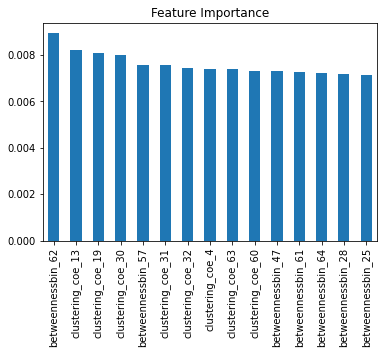

In [129]:
FeatureImportance(dfgroupall)

In [130]:
### feature importances for group of schizo subject

clustering_coe_19    0.009927
clustering_coe_31    0.009299
clustering_coe_30    0.008862
clustering_coe_32    0.008369
clustering_coe_24    0.007942
clustering_coe_63    0.007938
clustering_coe_61    0.007913
clustering_coe_59    0.007615
clustering_coe_29    0.007507
clustering_coe_62    0.007500
clustering_coe_56    0.007469
clustering_coe_14    0.007361
betweennessbin_63    0.007269
betweennessbin_53    0.007264
clustering_coe_28    0.007247
dtype: float64


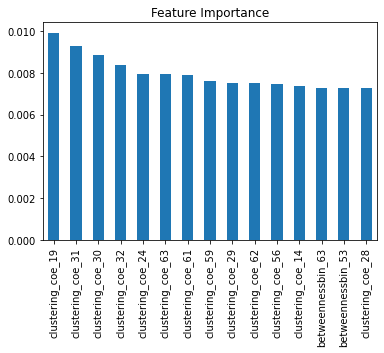

In [131]:
FeatureImportance(dfgroupallschizo)

##### old

In [96]:
def logisticregression(): 
    from sklearn import metrics
    log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')
    #log_reg=LogisticRegression(random_state=0, penalty='l2')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_train)

    # predict_proba - Probability estimates
    pred_proba = log_reg.predict_proba(X_train)
    print("The Training Accuracy is: ", log_reg.score(X_train, y_train))
    print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))
    print(classification_report(y_train, y_pred))
    print("Confusion matrix is: ")
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    

    y_pred_proba = log_reg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    return cm,log_reg.score(X_test, y_test)

def logisticregression2():
    from sklearn import metrics
    logreg = LogisticRegression()
    # fit the model with data
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    y_pred_proba = logreg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    return cnf_matrix,metrics.accuracy_score(y_test, y_pred)
    
    

def svm(): 
    #Import svm model
    from sklearn import metrics
    from sklearn import svm

    #Create a svm Classifier
    clf = svm.SVC(kernel='linear' , probability=True) # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test) 
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    return metrics.accuracy_score(y_test, y_pred)
    
    
def randomforest(): 
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    return metrics.accuracy_score(y_test, y_pred)
    

def naivebayes(): 
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy=metrics.accuracy_score(y_test,y_pred )
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    return accuracy

def decisiontreeclassifier(): 
    clf=DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test,y_pred ))
    
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    return metrics.accuracy_score(y_test,y_pred )

### feature extraction using correlation

In [69]:
corr = df.corr()

In [70]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
datan = df[selected_columns]

In [71]:
datan

,betweennessbin_1,betweennessbin_10,betweennessbin_11,betweennessbin_13,betweennessbin_14,betweennessbin_15,betweennessbin_16,betweennessbin_18,betweennessbin_19,betweennessbin_20,...,modularity_21,modularity_23,modularity_31,modularity_44,modularity_45,modularity_46,modularity_47,modularity_61,modularity_62,label
0,0.019629,0.019735,0.020038,0.000000,0.001406,0.018643,0.021517,0.018772,0.000000,0.010842,...,1,1,1,1,2,2,2,1,1,0
1,0.008846,0.010349,0.008332,0.000000,0.094784,0.085968,0.012249,0.036114,0.000000,0.050818,...,1,3,3,1,1,1,3,1,3,0
2,0.048901,0.023749,0.015418,0.000000,0.026777,0.034533,0.004662,0.066292,0.000000,0.040293,...,1,1,2,1,3,2,2,1,1,0
3,0.019370,0.033771,0.029418,0.000000,0.019238,0.040974,0.037804,0.838632,0.000000,0.048191,...,1,1,2,2,1,2,2,2,1,0
4,0.048805,0.012596,0.015733,0.000000,0.044352,0.037854,0.034704,0.017199,0.000000,0.024661,...,1,1,2,2,1,1,1,2,1,0
5,0.021748,0.022860,0.018642,0.000000,0.041578,0.020591,0.017829,0.000610,0.000000,0.025660,...,2,2,1,1,1,1,1,1,1,0
6,0.013323,0.024684,0.024835,0.000000,0.481996,0.029242,0.027909,0.024824,0.000000,0.014116,...,3,3,1,1,1,1,1,3,3,0
7,0.008287,0.015998,0.003845,0.000000,0.048597,0.036503,0.006551,0.143460,0.000000,0.058129,...,1,1,1,2,2,1,2,1,1,0
8,0.006361,0.013391,0.016691,0.000000,0.038954,0.036528,0.003245,0.100569,0.000000,0.054405,...,2,2,2,1,1,1,1,2,2,0
9,0.028389,0.003767,0.031931,0.000000,0.041313,0.022911,0.103173,0.028550,0.000000,0.048754,...,2,2,2,1,2,1,1,2,2,0


In [72]:

X = datan.loc[:, ~datan.columns.isin(['label'])]
y=datan[['label']]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(Xgroupschizo, ygroupschizo, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(526, 259)
(147, 259)
(59, 259)
(526, 1)
(147, 1)
(59, 1)


In [74]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train))
X_test = pd.DataFrame(sc_X.transform(X_test))


In [75]:
#### logistic regression

/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Training Accuracy is:  0.7832699619771863
The Testing Accuracy is:  0.5102040816326531
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       271
           1       0.78      0.78      0.78       255

    accuracy                           0.78       526
   macro avg       0.78      0.78      0.78       526
weighted avg       0.78      0.78      0.78       526

Confusion matrix is: 


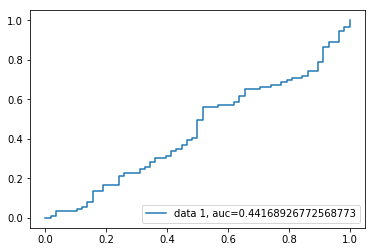

array([[214,  57],
       [ 57, 198]])

In [76]:
cm,acc_logisticregression=logisticregression()
cm

/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.2
Precision: 0.2222222222222222
Recall: 0.2857142857142857


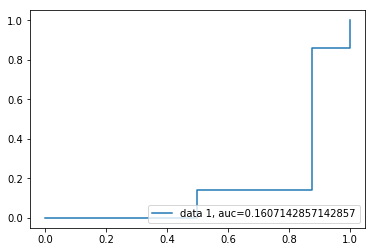

(array([[1, 7],
        [5, 2]]), 0.2)

In [39]:
cm2,acc_logisticregression2=logisticregression2()
cm2,acc_logisticregression

#### SVM

/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.26666666666666666
Precision: 0.25
Recall: 0.2857142857142857


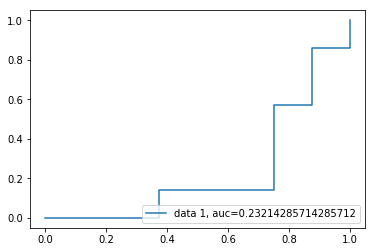

In [40]:
acc_svm=svm()

/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


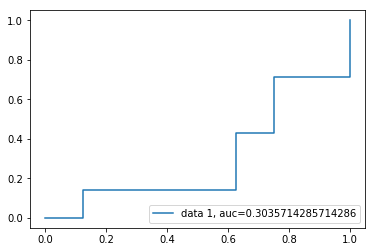

0.4

In [41]:
acc_naivebayes=naivebayes()
acc_naivebayes

Accuracy: 0.5333333333333333


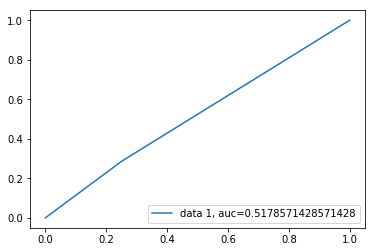

0.5333333333333333

In [42]:
acc_decisiontreeclassifier=decisiontreeclassifier()
acc_decisiontreeclassifier

/usr/lib/python3/dist-packages/ipykernel/__main__.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.3333333333333333


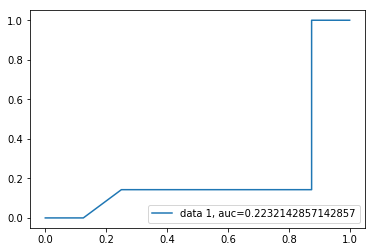

In [43]:
acc_randomforest=randomforest()

In [44]:
results = pd.DataFrame([['Correlation', acc_logisticregression,acc_svm,acc_naivebayes,acc_decisiontreeclassifier,acc_randomforest]],columns=['Feature selection ', 'Accuracy logistic regression', 'Accuracy SVM','Accuracy naivebayes','Accuracy decisiontreeclassifier','Accuracy randomforest'])
results

,Feature selection,Accuracy logistic regression,Accuracy SVM,Accuracy naivebayes,Accuracy decisiontreeclassifier,Accuracy randomforest
0,Correlation,0.2,0.266667,0.4,0.533333,0.333333


### model for feature selection

In [77]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
Xn = dataschizo.loc[:, ~dataschizo.columns.isin(['label'])]
y = dataschizo['label']


AttributeError: 'dict' object has no attribute 'loc'

In [46]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(Xn, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(Xn)
X_new.shape

/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(73, 6)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(52, 6)
(15, 6)
(6, 6)
(52,)
(15,)
(6,)


In [48]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train))
X_test = pd.DataFrame(sc_X.transform(X_test))


#### logistic regression

The Training Accuracy is:  0.7115384615384616
The Testing Accuracy is:  0.4666666666666667
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        27
           1       0.68      0.76      0.72        25

    accuracy                           0.71        52
   macro avg       0.71      0.71      0.71        52
weighted avg       0.72      0.71      0.71        52

Confusion matrix is: 


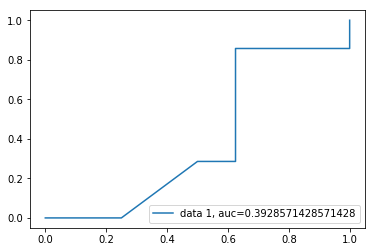

array([[18,  9],
       [ 6, 19]])

In [49]:
cm,acc_logisticregression=logisticregression()
cm

#### SVM

Accuracy: 0.4
Precision: 0.375
Recall: 0.42857142857142855


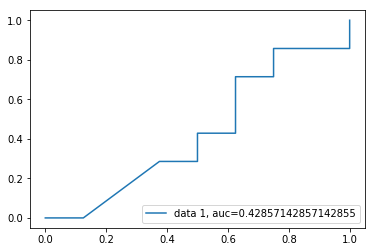

In [50]:
acc_svm=svm()

#### naive bayes

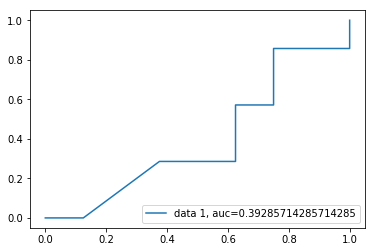

0.4

In [51]:
acc_naivebayes=naivebayes()
acc_naivebayes

#### decision tree classifier

Accuracy: 0.5333333333333333


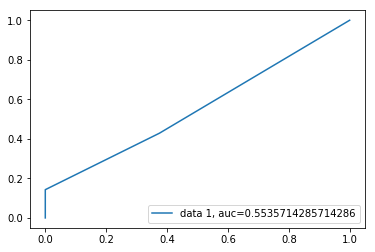

0.5333333333333333

In [52]:
acc_decisiontreeclassifier=decisiontreeclassifier()
acc_decisiontreeclassifier

Accuracy: 0.5333333333333333


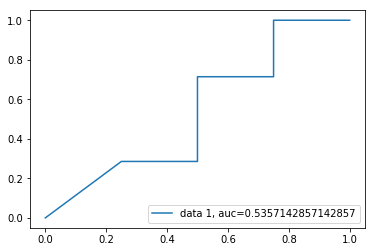

In [53]:
acc_randomforest=randomforest()

In [54]:


model_results = pd.DataFrame([['model for feature selection', acc_logisticregression,acc_svm,acc_naivebayes,acc_decisiontreeclassifier,acc_randomforest]],columns=['Feature selection ', 'Accuracy logistic regression', 'Accuracy SVM','Accuracy naivebayes','Accuracy decisiontreeclassifier','Accuracy randomforest'])


results = results.append(model_results, ignore_index = True)
results

,Feature selection,Accuracy logistic regression,Accuracy SVM,Accuracy naivebayes,Accuracy decisiontreeclassifier,Accuracy randomforest
0,Correlation,0.200000,0.266667,0.4,0.533333,0.333333
1,model for feature selection,0.466667,0.400000,0.4,0.533333,0.533333


### Tree-based feature selection

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

Xn5 = df.loc[:, ~df.columns.isin(['label'])]
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(Xn5, y)
clf.feature_importances_  


array([1.17130251e-02, 3.19081174e-03, 5.20122206e-03, 7.38511487e-03,
       0.00000000e+00, 7.71625485e-03, 2.92161805e-03, 4.21799156e-03,
       2.64421559e-03, 6.91191592e-03, 0.00000000e+00, 1.92979343e-03,
       5.91721477e-03, 4.15963997e-03, 8.28992287e-03, 8.25884753e-03,
       5.91206779e-03, 5.76937219e-03, 3.00676416e-03, 6.04298956e-03,
       8.15582368e-03, 9.05934057e-03, 5.02282477e-03, 1.40815626e-02,
       5.10013134e-03, 6.14953803e-04, 8.26076800e-03, 5.12035081e-03,
       6.36130571e-03, 7.24880971e-03, 8.42978105e-03, 3.86575457e-03,
       4.61703209e-03, 3.28255588e-03, 5.47264366e-03, 3.08407515e-03,
       7.39709489e-03, 5.30136583e-03, 6.68477182e-03, 7.27870237e-03,
       5.86367611e-03, 1.88547758e-03, 2.16549242e-03, 8.73195165e-03,
       5.03334287e-03, 2.02382361e-03, 4.36442745e-03, 5.80519478e-03,
       5.89311796e-03, 3.17539835e-03, 4.16599769e-03, 1.46146146e-03,
       3.06804707e-03, 3.06421163e-03, 3.39250567e-03, 6.39276941e-03,
      

In [37]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(Xn5)
X_new.shape   

(79, 121)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(56, 121)
(16, 121)
(7, 121)
(56,)
(16,)
(7,)


In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train))
X_test = pd.DataFrame(sc_X.transform(X_test))


#### logistic regression

The Training Accuracy is:  0.9821428571428571
The Testing Accuracy is:  0.375
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.96      0.98        27

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56

Confusion matrix is: 


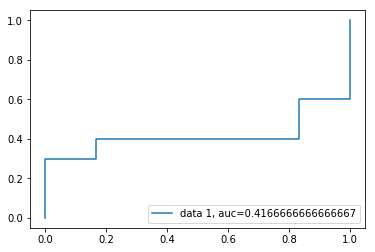

array([[29,  0],
       [ 1, 26]])

In [40]:
cm,acc_logisticregression=logisticregression()
cm

#### SVM


Accuracy: 0.375
Precision: 0.5
Recall: 0.4


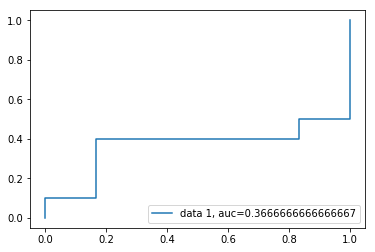

In [41]:
acc_svm=svm()

#### naive bayes


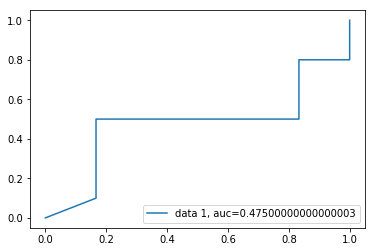

0.4375

In [42]:
acc_naivebayes=naivebayes()
acc_naivebayes

#### decision tree


Accuracy: 0.6875


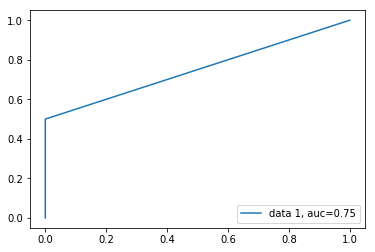

In [43]:
acc_decisiontreeclassifier=decisiontreeclassifier()

Accuracy: 0.375


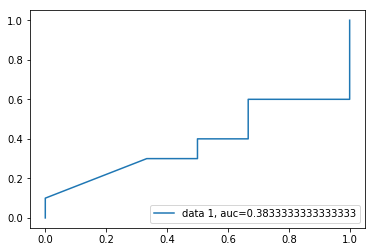

In [44]:
acc_randomforest=randomforest()

In [45]:

model_results_treebased = pd.DataFrame([['tree based feature selection', acc_logisticregression,acc_svm,acc_naivebayes,acc_decisiontreeclassifier,acc_randomforest]],columns=['Feature selection ', 'Accuracy logistic regression', 'Accuracy SVM','Accuracy naivebayes','Accuracy decisiontreeclassifier','Accuracy randomforest'])


results = results.append(model_results_treebased, ignore_index = True)
results

,Feature selection,Accuracy logistic regression,Accuracy SVM,Accuracy naivebayes,Accuracy decisiontreeclassifier,Accuracy randomforest
0,Correlation,0.3750,0.3750,0.5000,0.4375,0.4375
1,model for feature selection,0.6875,0.6875,0.5000,0.4375,0.4375
2,tree based feature selection,0.3750,0.3750,0.4375,0.6875,0.3750


### feature selection with variance thresold

In [46]:
from sklearn.feature_selection import VarianceThreshold
X3 = df.loc[:, ~df.columns.isin(['label'])]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new2=sel.fit_transform(X3)

In [47]:
X_new2.shape

(79, 145)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_new2, y, train_size = 0.8, test_size=0.2, random_state=15)
# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(56, 145)
(16, 145)
(7, 145)
(56,)
(16,)
(7,)


In [49]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train))
X_test = pd.DataFrame(sc_X.transform(X_test))


#### logistic regression

The Training Accuracy is:  0.9821428571428571
The Testing Accuracy is:  0.375
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.96      0.98        27

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56

Confusion matrix is: 


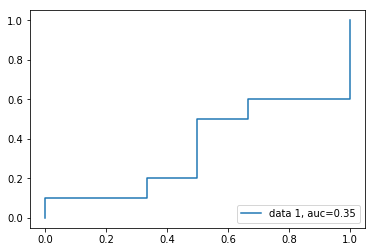

array([[29,  0],
       [ 1, 26]])

In [50]:
cm,acc_logisticregression=logisticregression()
cm

#### SVM

Accuracy: 0.375
Precision: 0.5
Recall: 0.3


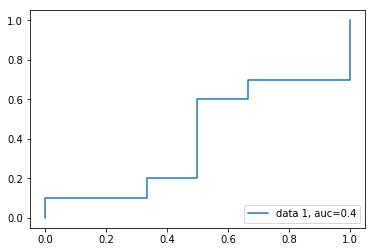

In [51]:
acc_svm=svm()

#### naive bayes

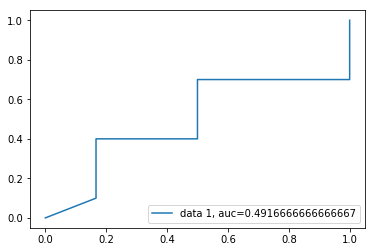

0.5

In [52]:
acc_naivebayes=naivebayes()
acc_naivebayes

#### decision tree classifier

Accuracy: 0.4375


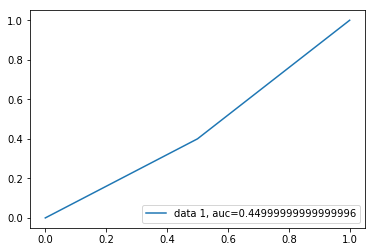

In [53]:
acc_decisiontreeclassifier=decisiontreeclassifier()

Accuracy: 0.5625


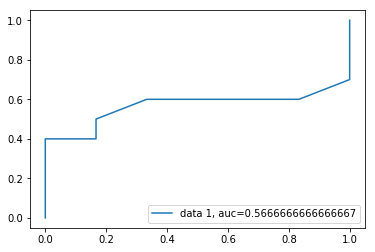

In [54]:
acc_randomforest=randomforest()

In [55]:
model_results_variance = pd.DataFrame([['model for variance thresold', acc_logisticregression,acc_svm,acc_naivebayes,acc_decisiontreeclassifier,acc_randomforest]],columns=['Feature selection ', 'Accuracy logistic regression', 'Accuracy SVM','Accuracy naivebayes','Accuracy decisiontreeclassifier','Accuracy randomforest'])


results = results.append(model_results_variance, ignore_index = True)
results

,Feature selection,Accuracy logistic regression,Accuracy SVM,Accuracy naivebayes,Accuracy decisiontreeclassifier,Accuracy randomforest
0,Correlation,0.3750,0.3750,0.5000,0.4375,0.4375
1,model for feature selection,0.6875,0.6875,0.5000,0.4375,0.4375
2,tree based feature selection,0.3750,0.3750,0.4375,0.6875,0.3750
3,model for variance thresold,0.3750,0.3750,0.5000,0.4375,0.5625


### recursive feature elimination

### Decision Tree Classifier

In [56]:
X_rfe = df.loc[:, ~df.columns.isin(['label'])]
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_rfe, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
accDecisionTree=mean(n_scores)
print(accDecisionTree)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

0.5529761904761904
Accuracy: 0.553 (0.173)


In [57]:
### LogisticRegression Classifier

In [58]:
X_rfe = df.loc[:, ~df.columns.isin(['label'])]
rfe = RFECV(estimator=LogisticRegression())
model = LogisticRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_rfe, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
accLogisticRegression=mean(n_scores)
print(accLogisticRegression)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

0.4982142857142857
Accuracy: 0.498 (0.107)


In [59]:
### Random Forest Classifier Classifier

In [60]:
X_rfe = df.loc[:, ~df.columns.isin(['label'])]
rfe = RFECV(estimator=RandomForestClassifier())
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_rfe, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
accRandomForest=mean(n_scores)
print(accRandomForest)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

0.4904761904761905
Accuracy: 0.490 (0.192)


In [61]:
from sklearn.svm import SVC
X_rfe = df.loc[:, ~df.columns.isin(['label'])]
model = SVC(kernel="linear", C=1)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_rfe, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
accSVM=mean(n_scores)
print(accSVM)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

0.43273809523809526
Accuracy: 0.433 (0.154)


In [ ]:
model_results_rfe = pd.DataFrame([['Recursive feature elimination', accLogisticRegression,accSVM,accDecisionTree,accRandomForest]],columns=['Feature selection ', 'Accuracy logistic regression', 'Accuracy SVM','Accuracy decisiontreeclassifier','Accuracy randomforest'])

model_results_rfe
#results = results.append(model_results_rfe, ignore_index = True)
#results

### old

In [53]:
X_rfe3 = df.loc[:, ~df.columns.isin(['label'])]

In [54]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [37]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # cart
    rfe= RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    

In [38]:
# evaluate a give model using cross-validation
def evaluate_model(model, X_rfe3, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_rfe3, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [39]:
models.items()

AttributeError: 'NoneType' object has no attribute 'items'

In [40]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_rfe3, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

AttributeError: 'NoneType' object has no attribute 'items'

In [93]:
X_rfe3 = df.loc[:, ~df.columns.isin(['label'])]
X_train, X_test, y_train, y_test = train_test_split(X_rfe3, y, train_size = 0.8, test_size=0.2, random_state=15)

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [45]:
from sklearn.svm import LinearSVC
svm2 = svm.SVC(kernel='linear')
svm2.fit(X_train, y_train)


/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_pred = svm2.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['SVM', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.0625,0.0,0.0,0.0


In [47]:
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(svm2, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]


/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False ... False False False]
[2731 2680 2854 ... 2662 3317 1320]


Index(['betweennessbin10_26', 'betweennessbin10_27', 'betweennessbin10_28',
       'betweennessbin10_32', 'betweennessbin10_35', 'betweennessbin10_36',
       'betweennessbin10_40', 'betweennessbin10_43', 'betweennessbin10_46',
       'betweennessbin10_49',
       ...
       'modularity9_65', 'modularity9_67', 'transitivity10_1',
       'transitivity19_1', 'transitivity21_1', 'transitivity22_1',
       'transitivity38_1', 'transitivity39_1', 'transitivity5_1',
       'transitivity6_1'],
      dtype='object', length=5500)

In [48]:
svm2 = svm.SVC(kernel='linear')
svm2.fit(X_train[X_train.columns[rfe.support_]], y_train)
# Predicting Test Set
y_pred = svm2.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.0625,0.0,0.0,0.0
1,SVM,0.0625,0.0,0.0,0.0


### Tree-based feature selection

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

Xn5 = df.loc[:, ~df.columns.isin(['label'])]
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(Xn5, y)
clf.feature_importances_  


/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


array([0.        , 0.        , 0.00049017, ..., 0.        , 0.        ,
       0.        ])

In [50]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(Xn5)
X_new.shape   

(79, 1632)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(56, 1632)
(16, 1632)
(7, 1632)
(56, 1)
(16, 1)
(7, 1)


### SVM

In [52]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3125


In [54]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.45454545454545453
Recall: 0.5


### feature selection with variance thresold

In [55]:
from sklearn.feature_selection import VarianceThreshold
X3 = df.loc[:, ~df.columns.isin(['label'])]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new2=sel.fit_transform(X3)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new2, y, train_size = 0.8, test_size=0.2, random_state=15)
# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(56, 2908)
(16, 2908)
(7, 2908)
(56, 1)
(16, 1)
(7, 1)


In [57]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train))
X_test = pd.DataFrame(sc_X.transform(X_test))


### SVM

In [58]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


/home/vakpawar/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.125


In [60]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.25
Recall: 0.2


###  Random forest 

In [10]:
X = df.loc[:, ~df.columns.isin(['label'])]
y = df['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [12]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.125


###  feature importance

In [14]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(X.columns)).sort_values(ascending=False)
feature_imp

modularity33_56        0.002636
betweennessbin27_14    0.002514
clustering_coe33_57    0.002323
clustering_coe35_21    0.002210
degree40_15            0.002177
clustering_coe34_26    0.002055
betweennessbin22_43    0.002023
clustering_coe35_41    0.002009
degree35_56            0.001999
modularity18_27        0.001977
betweennessbin34_9     0.001972
betweennessbin23_67    0.001966
clustering_coe20_67    0.001945
degree11_28            0.001915
degree35_20            0.001885
modularity7_11         0.001871
degree23_51            0.001858
betweennessbin24_1     0.001817
degree23_57            0.001809
modularity38_10        0.001801
degree15_46            0.001797
betweennessbin1_58     0.001796
betweennessbin17_66    0.001778
clustering_coe40_60    0.001773
betweennessbin27_67    0.001739
modularity12_10        0.001729
betweennessbin7_3      0.001719
betweennessbin15_64    0.001705
clustering_coe28_1     0.001699
betweennessbin20_3     0.001678
                         ...   
degree31

In [16]:
features= feature_imp[feature_imp>0]
features.index

Index(['modularity33_56', 'betweennessbin27_14', 'clustering_coe33_57',
       'clustering_coe35_21', 'degree40_15', 'clustering_coe34_26',
       'betweennessbin22_43', 'clustering_coe35_41', 'degree35_56',
       'modularity18_27',
       ...
       'modularity32_36', 'degree20_26', 'betweennessbin27_22',
       'clustering_coe22_10', 'modularity17_21', 'clustering_coe23_37',
       'degree31_9', 'betweennessbin36_49', 'degree8_33', 'degree26_15'],
      dtype='object', length=1388)

In [17]:
cols = features.index
X_new=X[cols]
X_new

,modularity33_56,betweennessbin27_14,clustering_coe33_57,clustering_coe35_21,degree40_15,clustering_coe34_26,betweennessbin22_43,clustering_coe35_41,degree35_56,modularity18_27,...,modularity32_36,degree20_26,betweennessbin27_22,clustering_coe22_10,modularity17_21,clustering_coe23_37,degree31_9,betweennessbin36_49,degree8_33,degree26_15
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
6,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
7,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,64.0,0.0
8,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
9,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [19]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.375
